<a href="https://colab.research.google.com/github/Dynamo-Dream/Stock_Price_Prediction/blob/main/TCS_STOCK_PRice_PRediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Price Prediction of AIRTEL Stock

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [41]:
df = pd.read_csv("/content/tcs.csv")

In [42]:
df = df[::-1] ## Only To reverse Dataset
df = df.reset_index(drop=True)

In [43]:
df.head()

Date  series      OPEN      HIGH       LOW  PREV. CLOSE       ltp   \
0  23-Sep-2022      EQ  3,004.00  3,022.50  2,979.00     3,007.40  2,986.65   
1  26-Sep-2022      EQ  2,959.85  3,025.85  2,926.10     2,982.05  3,000.00   
2  27-Sep-2022      EQ  3,009.40  3,025.00  2,976.00     2,994.40  3,024.40   
3  28-Sep-2022      EQ  2,980.00  3,049.95  2,980.00     3,017.45  3,028.35   
4  29-Sep-2022      EQ  3,054.00  3,055.85  2,990.00     3,035.65  3,010.00   

     close      vwap     52W H     52W L     VOLUME              VALUE   \
0  2,982.05  3,001.09  4,043.00  2,953.00  26,52,374  7,96,00,14,548.90   
1  2,994.40  2,977.75  4,043.00  2,926.10  29,25,489  8,71,13,83,905.80   
2  3,017.45  3,005.33  4,043.00  2,926.10  22,27,447  6,69,42,21,179.95   
3  3,035.65  3,028.75  4,043.00  2,926.10  27,39,767  8,29,80,67,346.75   
4  2,997.30  3,009.23  4,043.00  2,926.10  24,93,902  7,50,47,29,874.70   

  No of trades   
0      1,87,233  
1      1,67,767  
2      1,31,328  
3      1,51,305  
4      1,33,642

In [44]:
df.isna().sum()

Date             0
series           0
OPEN             0
HIGH             0
LOW              0
PREV. CLOSE      0
ltp              0
close            0
vwap             0
52W H            0
52W L            0
VOLUME           0
VALUE            0
No of trades     0
dtype: int64

In [45]:
df.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [46]:
target = 'close '
if(df[target].dtype == 'O'):
  df[target] = df[target].str.replace(',', '').astype(float)


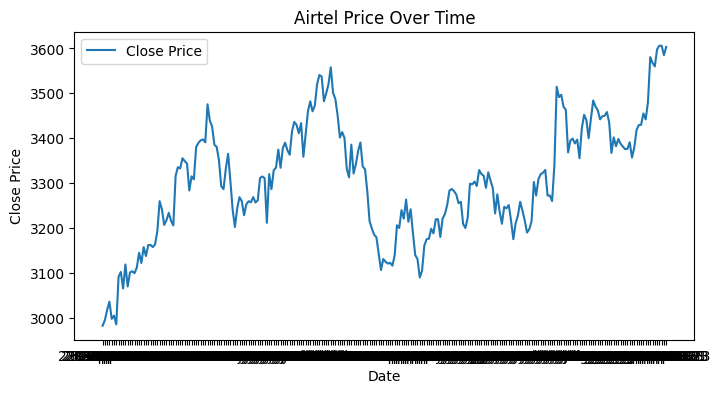

In [47]:
stock_name = "Airtel"
plt.figure(figsize=(8, 4))
plt.plot(df["Date "],df[target], label='Close Price')
plt.title( stock_name +' Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

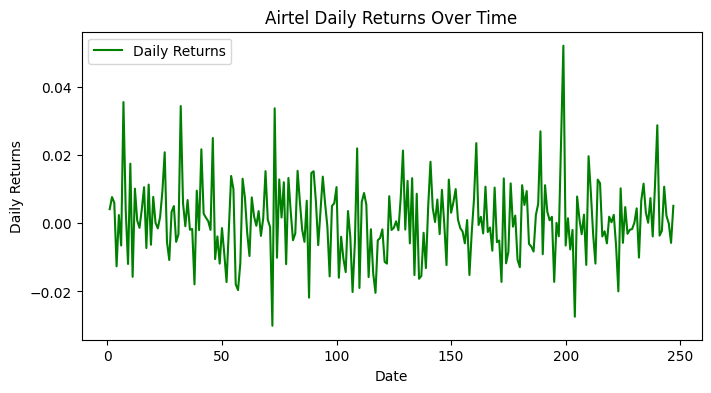

In [48]:
daily_returns = df[target].pct_change()
plt.figure(figsize=(8, 4))
plt.plot(daily_returns, label='Daily Returns', color='green')
plt.title(stock_name+ ' Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()

In [49]:
print("Summary Statistics:")
print(df[target].describe())

Summary Statistics:
count     248.000000
mean     3305.368750
std       131.506055
min      2982.050000
25%      3215.325000
50%      3306.950000
75%      3397.012500
max      3606.150000
Name: close , dtype: float64


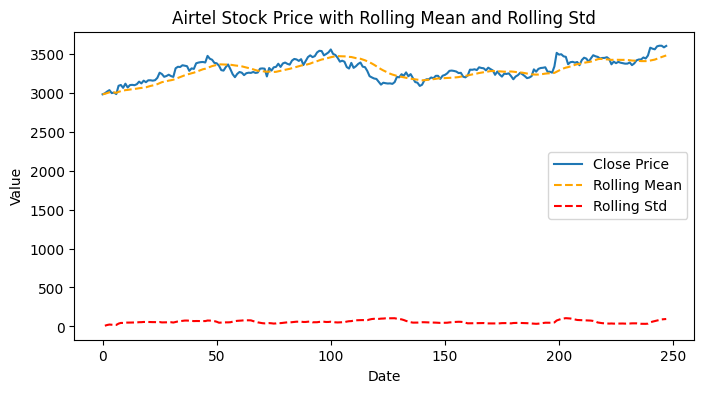

In [50]:
window = 20
df['Rolling Mean'] = df[target].rolling(window=window,min_periods=1).mean()
df['Rolling Std'] = df[target].rolling(window=window,min_periods=1).std()

plt.figure(figsize=(8, 4))
plt.plot(df[target], label='Close Price')
plt.plot(df['Rolling Mean'],  linestyle='--', color='orange',label="Rolling Mean")
plt.plot(df['Rolling Std'], linestyle='--', color='red',label = "Rolling Std")
plt.title(stock_name + ' Stock Price with Rolling Mean and Rolling Std')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

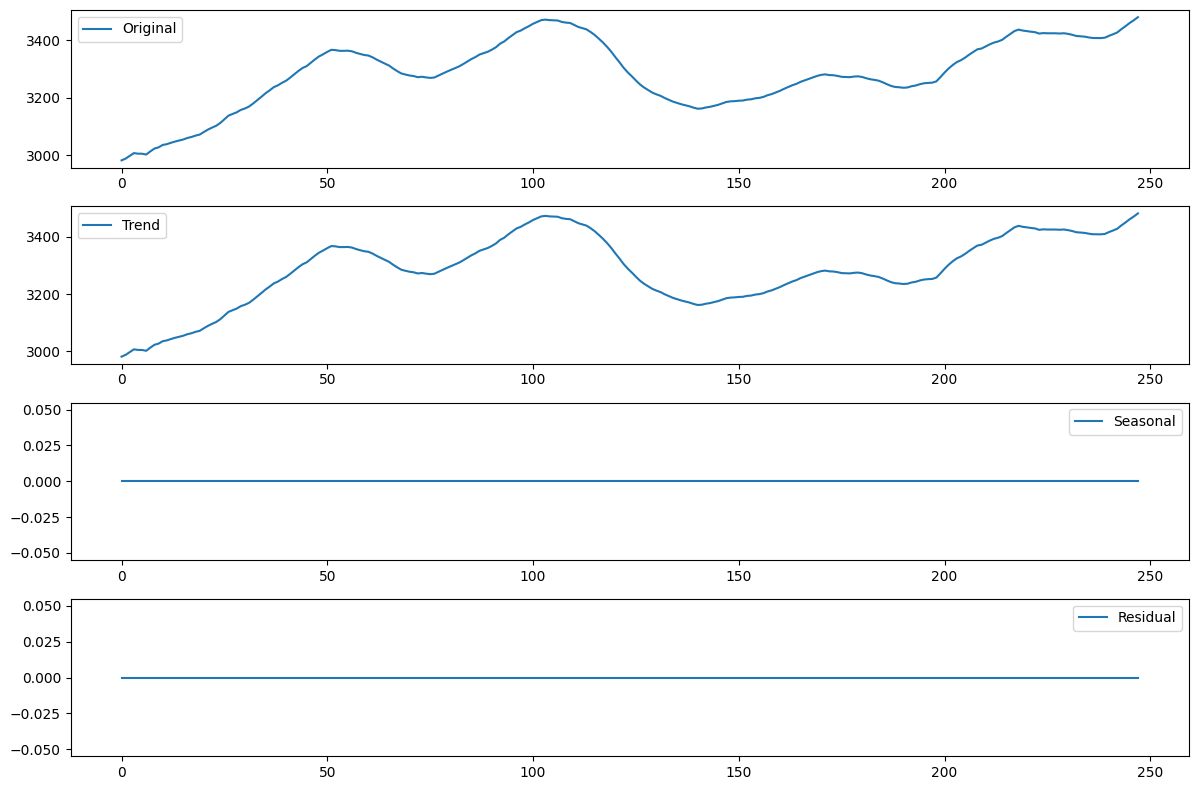

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df["Rolling Mean"], model='additive', period=1)
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df.index,df["Rolling Mean"], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.tight_layout()
plt.show()

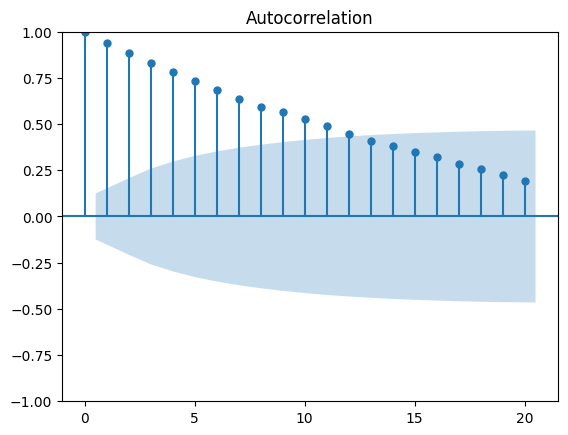

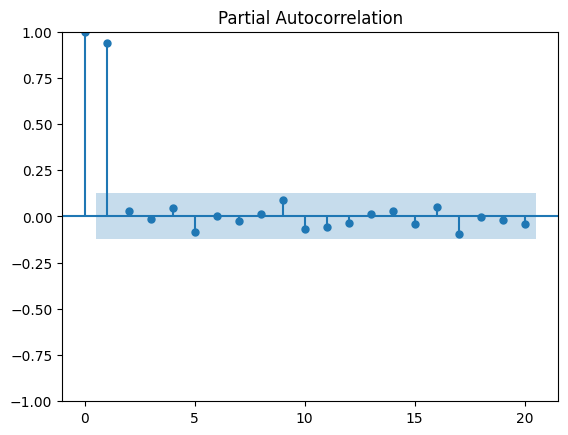

In [52]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
lag = 20
acf = plot_acf(df[target],lags = lag)
pacf = plot_pacf(df[target],lags = lag)

In [53]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df[target],autolag='AIC')
print("ADF: ", dftest[0])
print("P-Value: ", dftest[1])
print("Num Of Lags: ", dftest[2])
print("Num of observation used for ADF Regression and Critical Values Calculation: ", dftest[3])
print("Critical Value")
for key,val in dftest[4].items():
    print("\t",key,": ",val)

ADF:  -2.3585805459006366
P-Value:  0.15376949678448998
Num Of Lags:  0
Num of observation used for ADF Regression and Critical Values Calculation:  247
Critical Value
	 1% :  -3.457105309726321
	 5% :  -2.873313676101283
	 10% :  -2.5730443824681606


In [54]:
df.set_index("Date ", inplace=True)
data = df[target]

In [55]:
data = pd.DataFrame(data,columns=['close '])
data.head()

close 
Date                
23-Sep-2022  2982.05
26-Sep-2022  2994.40
27-Sep-2022  3017.45
28-Sep-2022  3035.65
29-Sep-2022  2997.30

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [57]:
length = data.size
timestamp = 20
percent_data = 0.85

In [58]:
data

close 
Date                
23-Sep-2022  2982.05
26-Sep-2022  2994.40
27-Sep-2022  3017.45
28-Sep-2022  3035.65
29-Sep-2022  2997.30
...              ...
15-Sep-2023  3598.30
18-Sep-2023  3606.15
20-Sep-2023  3606.05
21-Sep-2023  3585.30
22-Sep-2023  3603.65

[248 rows x 1 columns]

In [59]:
from math import ceil
train = data.iloc[:ceil(length*percent_data),0]
test = data.iloc[ceil(length*percent_data)-timestamp:,0]

In [60]:
train = pd.DataFrame(train,columns=['close '])
test = pd.DataFrame(test,columns=['close '])

In [61]:
train.head()

close 
Date                
23-Sep-2022  2982.05
26-Sep-2022  2994.40
27-Sep-2022  3017.45
28-Sep-2022  3035.65
29-Sep-2022  2997.30

In [62]:
scaler.fit(train)

MinMaxScaler()

In [63]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [64]:
scaled_train

array([[0.        ],
       [0.02144097],
       [0.06145833],
       [0.09305556],
       [0.02647569],
       [0.0390625 ],
       [0.00503472],
       [0.18940972],
       [0.20815972],
       [0.14383681],
       [0.23697917],
       [0.15190972],
       [0.20607639],
       [0.21050347],
       [0.20329861],
       [0.22517361],
       [0.28237847],
       [0.24270833],
       [0.30425347],
       [0.26970486],
       [0.31189236],
       [0.31258681],
       [0.30442708],
       [0.31458333],
       [0.36649306],
       [0.48203125],
       [0.45078125],
       [0.39010417],
       [0.40859375],
       [0.43689236],
       [0.40625   ],
       [0.38819444],
       [0.5796875 ],
       [0.61362847],
       [0.60859375],
       [0.64809028],
       [0.63706597],
       [0.62743056],
       [0.52335069],
       [0.57795139],
       [0.56640625],
       [0.69114583],
       [0.70763889],
       [0.71736111],
       [0.72100694],
       [0.70963542],
       [0.85694444],
       [0.793

In [65]:
train_length = scaled_train.size
val_percent = 0.10
train_data = scaled_train[:ceil(train_length*(1-val_percent))]
val_data = scaled_train[ceil(train_length*(1-val_percent))-timestamp:]
train_length

211

In [66]:
def GenerateTimeSeries(dataset, timestamp, dataset_length):
  X = []
  Y = []
  for i in range(timestamp, dataset_length):
    X.append(dataset[i-timestamp:i,0])
    Y.append(dataset[i,0])
  X,Y = np.array(X),np.array(Y)

  return X,Y


In [67]:
train_data.shape[0]

190

In [68]:
timestamp = 20
X_train,Y_train = GenerateTimeSeries(train_data,timestamp, train_data.shape[0])

X_test,Y_test = GenerateTimeSeries(scaled_test, timestamp, scaled_test.shape[0])

In [69]:
X_val, Y_val = GenerateTimeSeries(val_data, timestamp, val_data.shape[0])

In [70]:
X_train,Y_train

(array([[0.        , 0.02144097, 0.06145833, ..., 0.24270833, 0.30425347,
         0.26970486],
        [0.02144097, 0.06145833, 0.09305556, ..., 0.30425347, 0.26970486,
         0.31189236],
        [0.06145833, 0.09305556, 0.02647569, ..., 0.26970486, 0.31189236,
         0.31258681],
        ...,
        [0.58012153, 0.53376736, 0.59366319, ..., 0.44522569, 0.40677083,
         0.36041667],
        [0.53376736, 0.59366319, 0.56171875, ..., 0.40677083, 0.36041667,
         0.37378472],
        [0.59366319, 0.56171875, 0.53272569, ..., 0.36041667, 0.37378472,
         0.40520833]]),
 array([0.31189236, 0.31258681, 0.30442708, 0.31458333, 0.36649306,
        0.48203125, 0.45078125, 0.39010417, 0.40859375, 0.43689236,
        0.40625   , 0.38819444, 0.5796875 , 0.61362847, 0.60859375,
        0.64809028, 0.63706597, 0.62743056, 0.52335069, 0.57795139,
        0.56640625, 0.69114583, 0.70763889, 0.71736111, 0.72100694,
        0.70963542, 0.85694444, 0.79357639, 0.77057292, 0.70017361,
 

In [71]:
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM,Dropout,GRU, Input

In [72]:
def lstm_model(input_shape):
  regressor = Sequential()
  regressor.add(LSTM(units=100,return_sequences=True, input_shape = input_shape))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(LSTM(units=100))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))

  noise = Input(shape = input_shape)
  output = regressor(noise)

  regressor.summary()
  return Model(noise,output)

def gru_model(input_shape):
  regressor = Sequential()
  regressor.add(GRU(units=100, return_sequences=True, input_shape = input_shape))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100, return_sequences=True))
  regressor.add(Dropout(0.2))
  regressor.add(GRU(units=100))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(units=1))

  noise = Input(shape = input_shape)
  output = regressor(noise)
  regressor.summary()
  return Model(noise,output)

In [73]:
feature = 1
input_shape = (timestamp,feature)
lstm = lstm_model(input_shape)
gru = gru_model(input_shape)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 20, 100)           40800     
                                                                 
 dropout_10 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_6 (LSTM)               (None, 20, 100)           80400     
                                                                 
 dropout_11 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 20, 100)           80400     
                                                                 
 dropout_12 (Dropout)        (None, 20, 100)           0         
                                                                 
 lstm_8 (LSTM)               (None, 20, 100)          

In [74]:
lstm.compile(optimizer='adam', loss='mse')
gru.compile(optimizer='adam', loss='mse')

In [75]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=6,
    verbose=1,
    mode='min'
)

In [76]:
lstm.fit(X_train, Y_train, validation_data= (X_val,Y_val), epochs=150, batch_size=32)

Epoch 1/150
6/6 [==============================] - 13s 738ms/step - loss: 0.1670 - val_loss: 0.0175
Epoch 2/150
6/6 [==============================] - 1s 91ms/step - loss: 0.0611 - val_loss: 0.1319
Epoch 3/150
6/6 [==============================] - 1s 95ms/step - loss: 0.0434 - val_loss: 0.0190
Epoch 4/150
6/6 [==============================] - 1s 94ms/step - loss: 0.0287 - val_loss: 0.0585
Epoch 5/150
6/6 [==============================] - 1s 91ms/step - loss: 0.0318 - val_loss: 0.0446
Epoch 6/150
6/6 [==============================] - 1s 94ms/step - loss: 0.0263 - val_loss: 0.0282
Epoch 7/150
6/6 [==============================] - 1s 93ms/step - loss: 0.0292 - val_loss: 0.0478
Epoch 8/150
6/6 [==============================] - 1s 91ms/step - loss: 0.0281 - val_loss: 0.0394
Epoch 9/150
6/6 [==============================] - 1s 92ms/step - loss: 0.0287 - val_loss: 0.0382
Epoch 10/150
6/6 [==============================] - 1s 91ms/step - loss: 0.0255 - val_loss: 0.0468
Epoch 11/150
6/6 

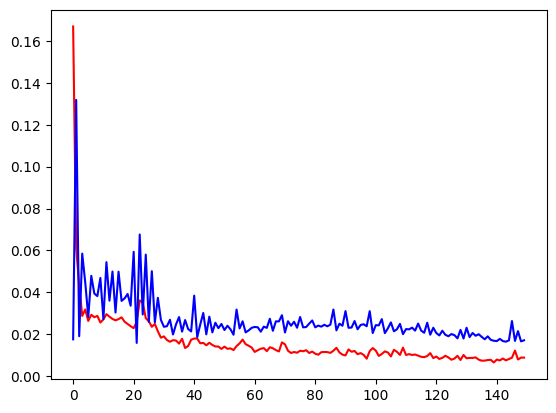

In [77]:
plt.plot(lstm.history.history['loss'],color='red',label='train')
plt.plot(lstm.history.history['val_loss'],color='blue',label='train')

In [78]:
gru.fit(X_train, Y_train, validation_data= (X_val,Y_val), epochs=150, batch_size=32)

Epoch 1/150
6/6 [==============================] - 13s 454ms/step - loss: 0.1495 - val_loss: 0.0162
Epoch 2/150
6/6 [==============================] - 0s 84ms/step - loss: 0.0360 - val_loss: 0.0514
Epoch 3/150
6/6 [==============================] - 1s 86ms/step - loss: 0.0209 - val_loss: 0.0164
Epoch 4/150
6/6 [==============================] - 0s 83ms/step - loss: 0.0175 - val_loss: 0.0463
Epoch 5/150
6/6 [==============================] - 1s 87ms/step - loss: 0.0207 - val_loss: 0.0173
Epoch 6/150
6/6 [==============================] - 1s 86ms/step - loss: 0.0200 - val_loss: 0.0322
Epoch 7/150
6/6 [==============================] - 1s 88ms/step - loss: 0.0166 - val_loss: 0.0243
Epoch 8/150
6/6 [==============================] - 0s 84ms/step - loss: 0.0155 - val_loss: 0.0290
Epoch 9/150
6/6 [==============================] - 1s 87ms/step - loss: 0.0169 - val_loss: 0.0190
Epoch 10/150
6/6 [==============================] - 1s 144ms/step - loss: 0.0147 - val_loss: 0.0394
Epoch 11/150
6/6

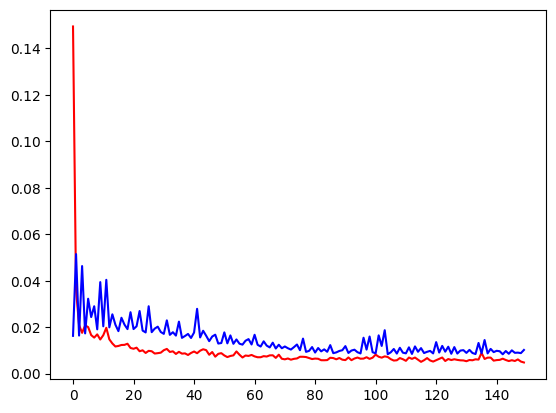

In [79]:
plt.plot(gru.history.history['loss'],color='red',label='train')
plt.plot(gru.history.history['val_loss'],color='blue',label='train')

In [80]:
gru_pred = gru.predict(X_test)

2/2 [==============================] - 2s 14ms/step


In [81]:
lstm_pred = lstm.predict(X_test)

2/2 [==============================] - 2s 14ms/step


In [82]:
gru_pred[0],lstm_pred[0],Y_test[0]

(array([0.71970844], dtype=float32),
 array([0.6868931], dtype=float32),
 0.8159722222222223)

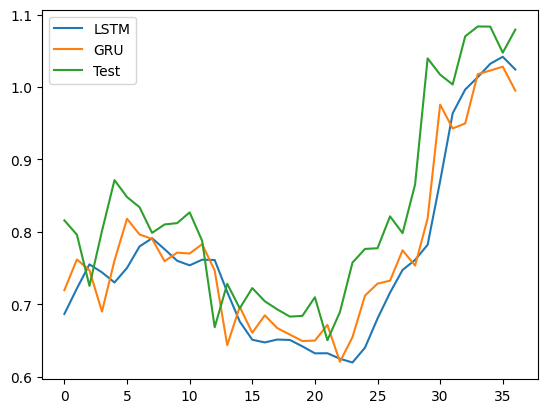

In [83]:
plt.plot(lstm_pred, label='LSTM')
plt.plot(gru_pred, label='GRU')
plt.plot(Y_test,label="Test")
plt.legend()
plt.show()

In [84]:
lstm_pred = np.array(lstm_pred)
gru_pred = np.array(gru_pred)

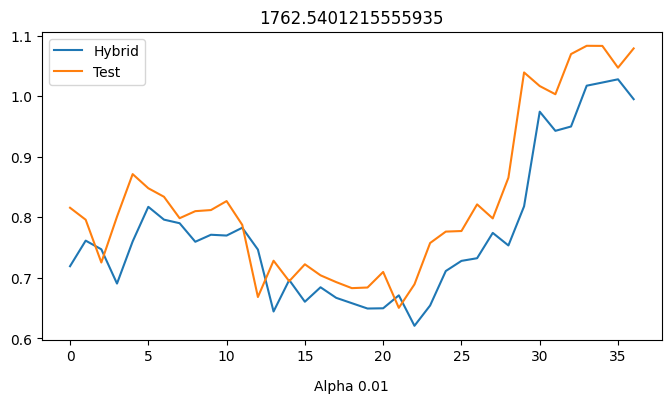

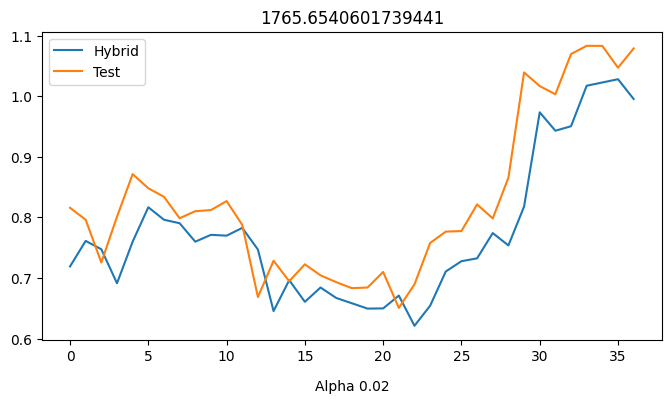

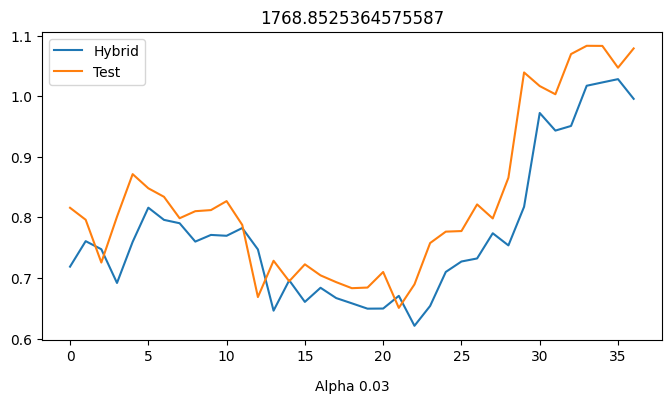

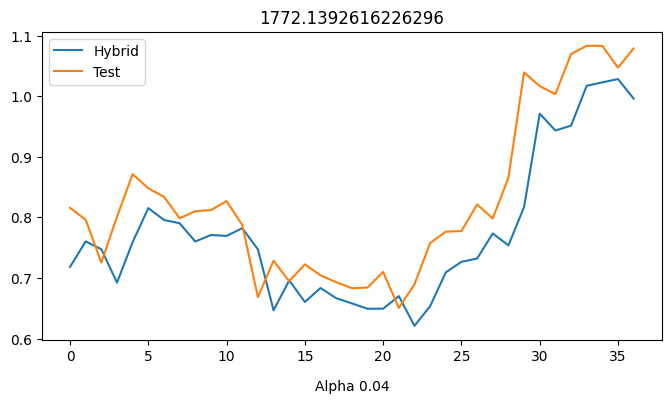

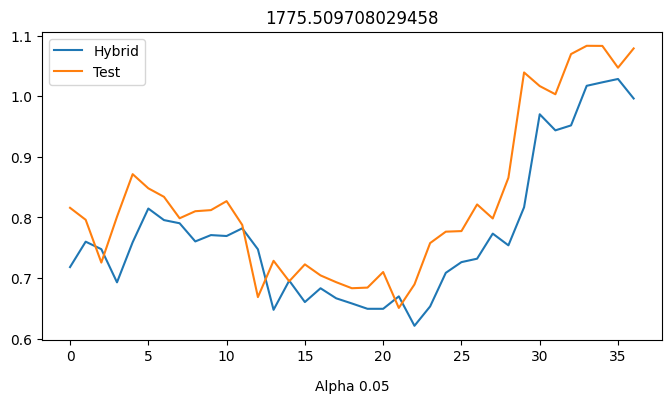

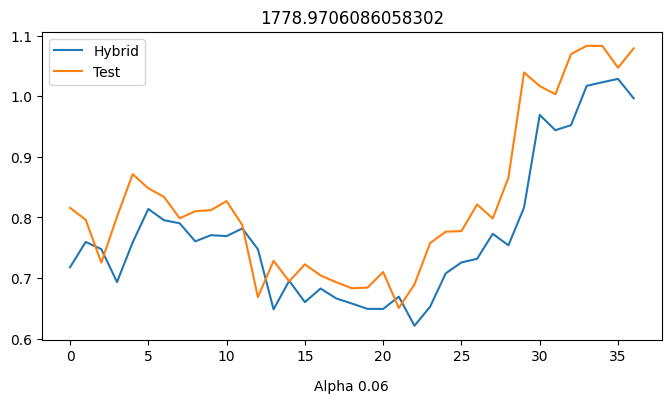

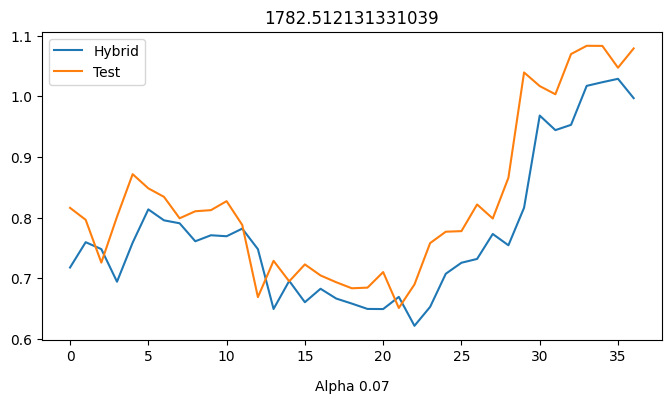

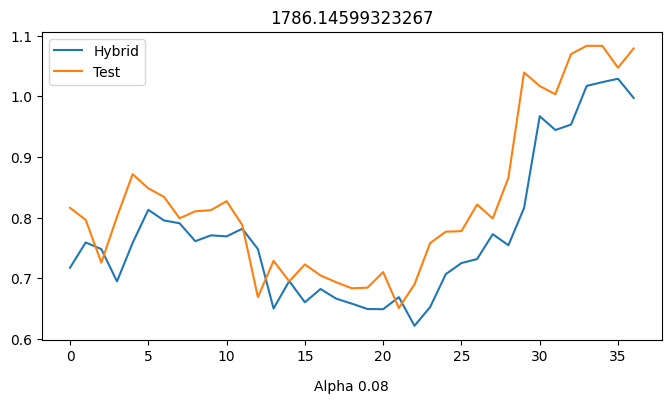

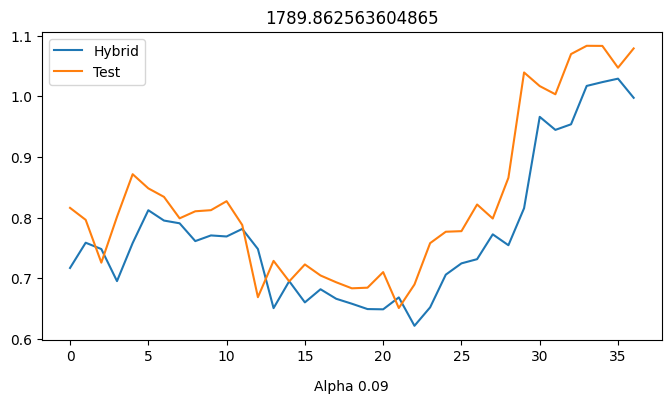

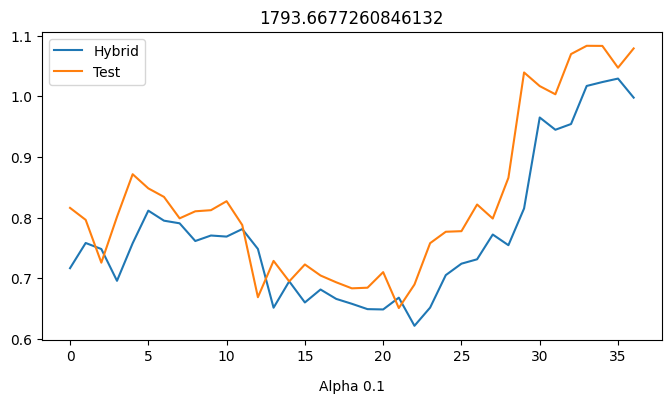

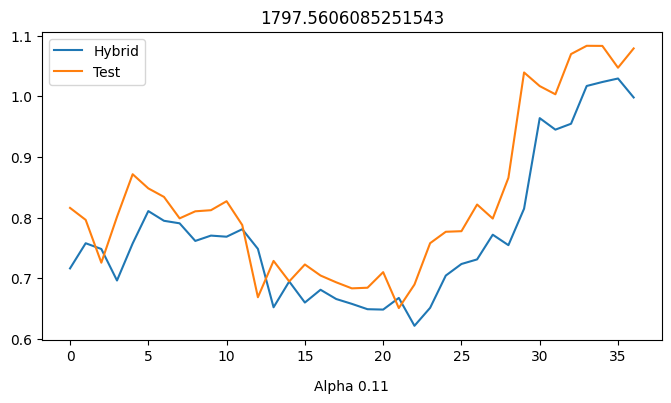

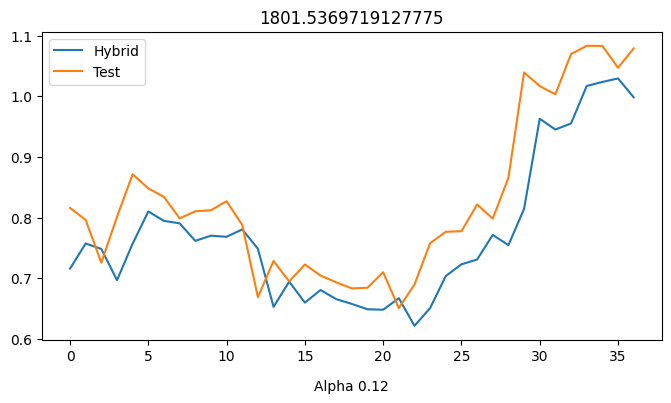

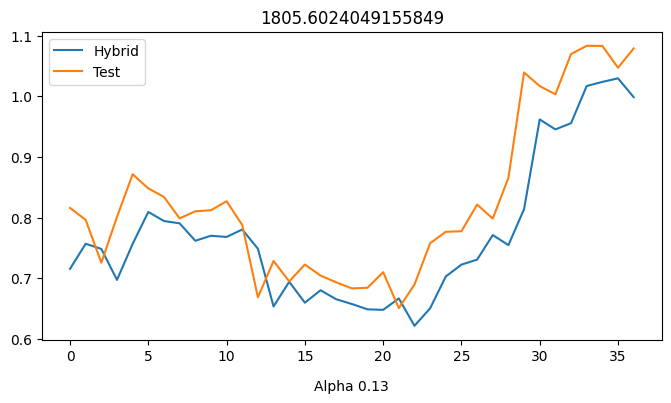

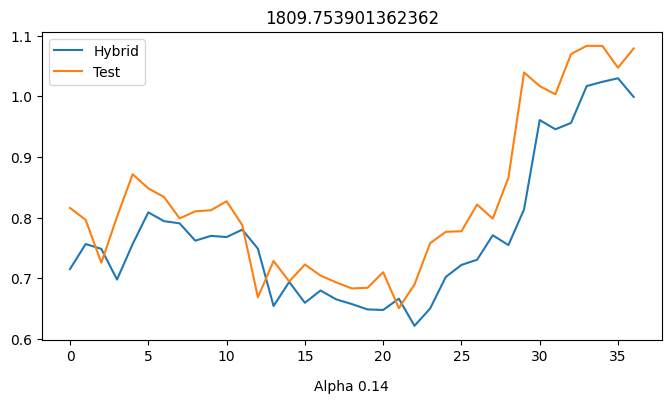

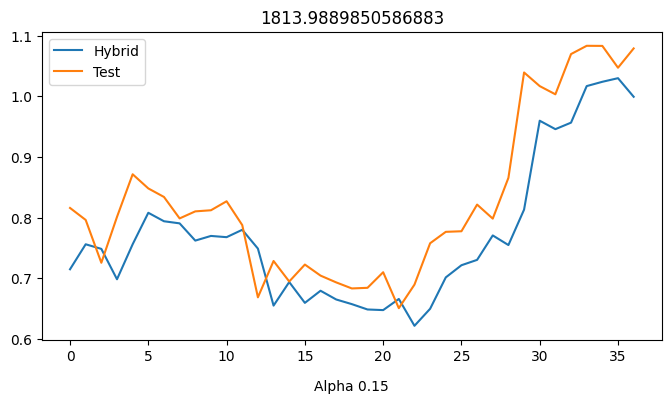

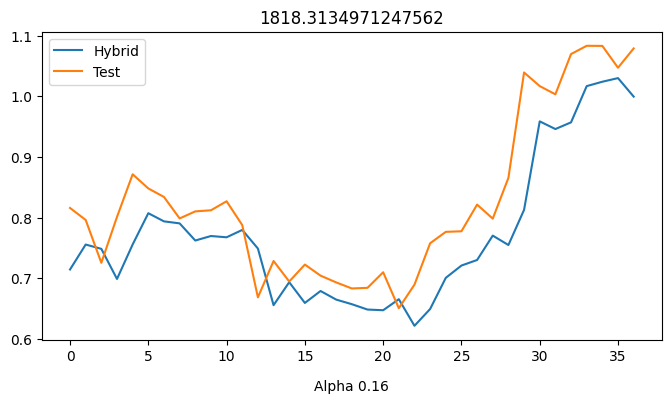

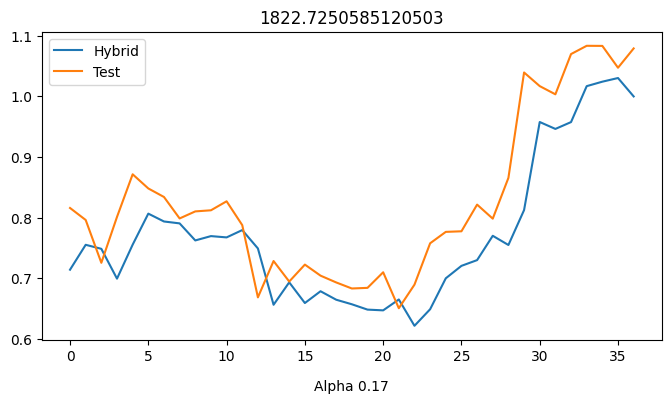

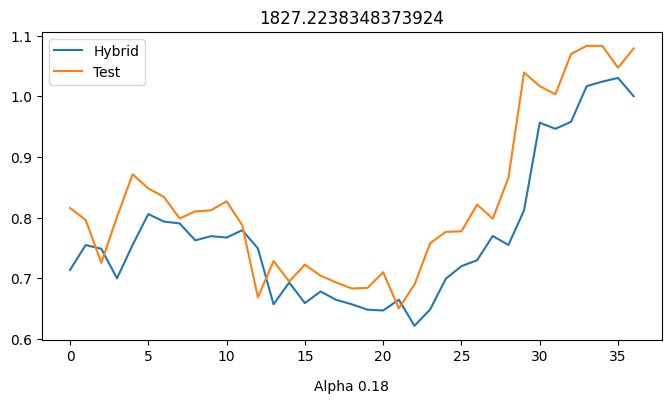

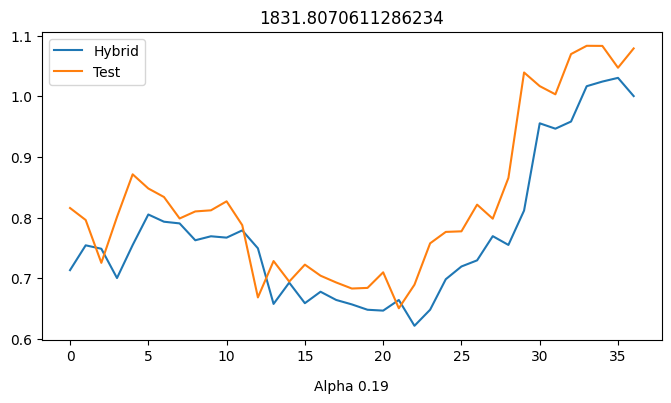

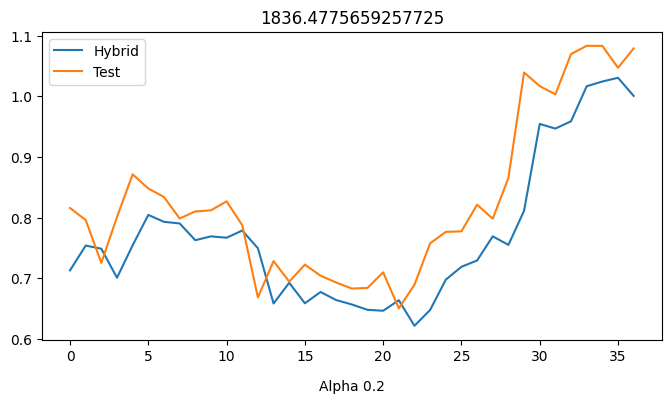

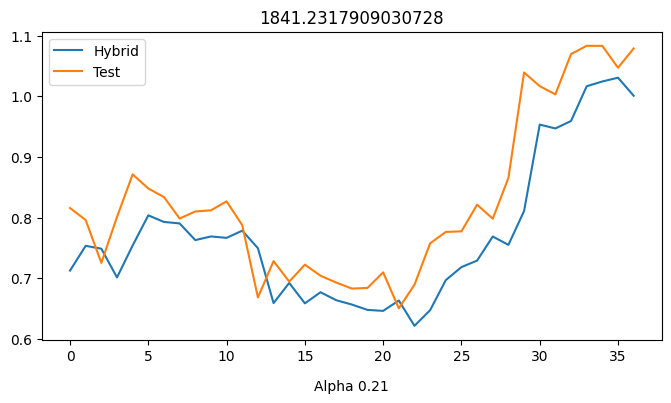

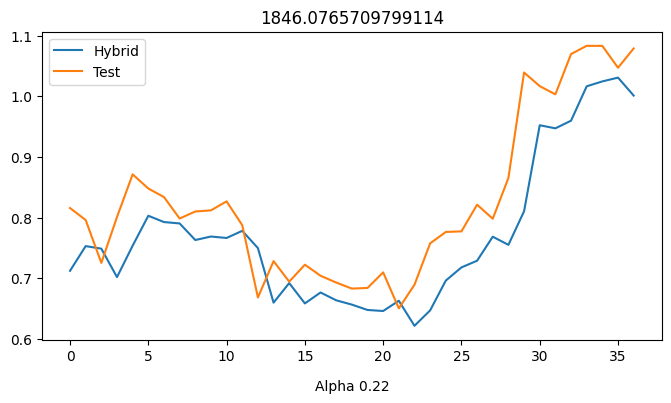

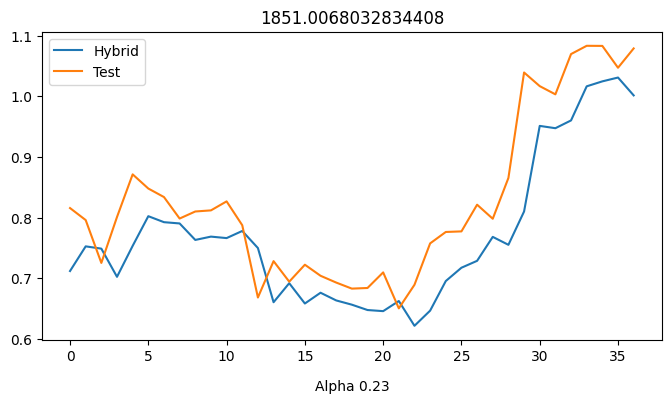

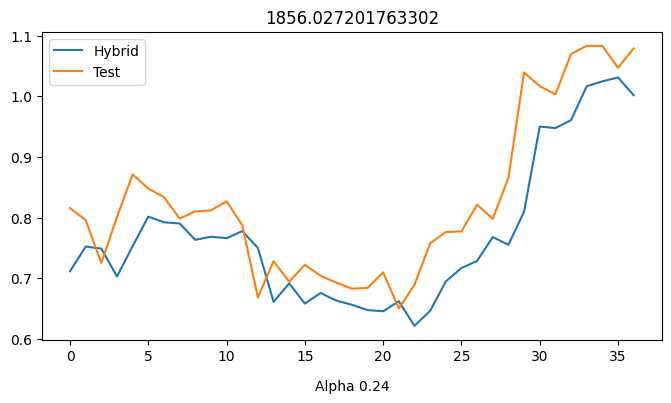

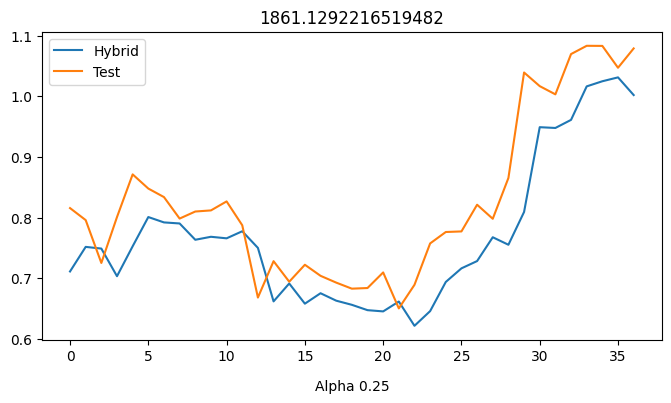

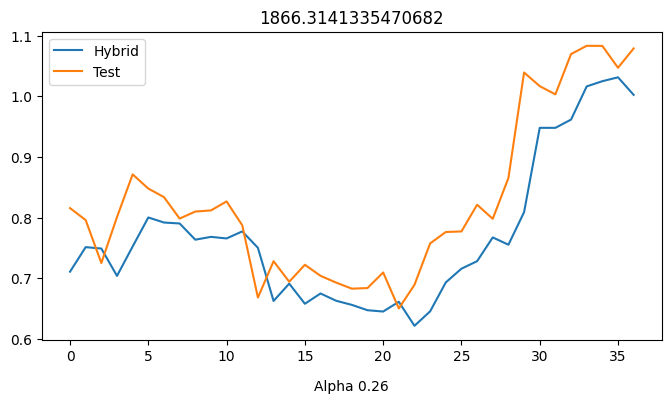

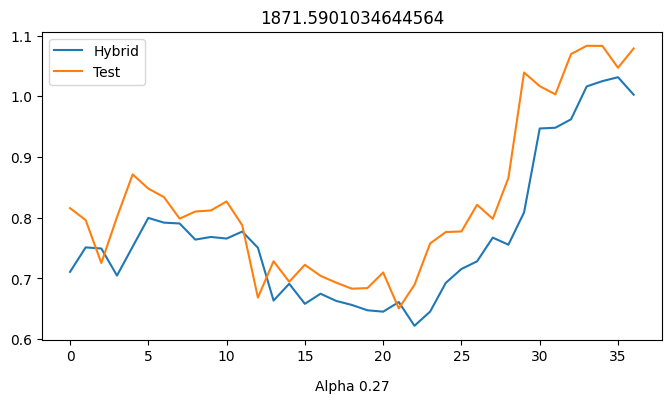

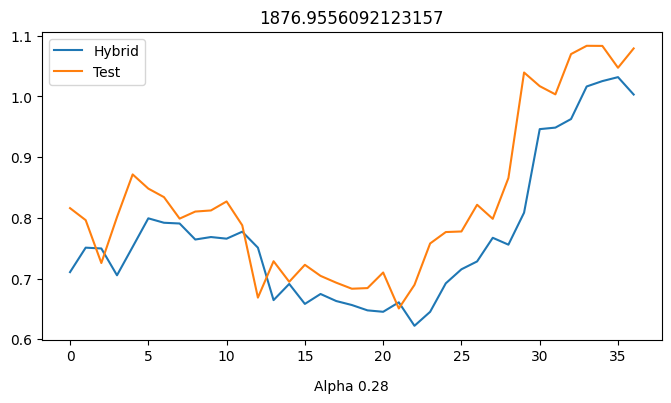

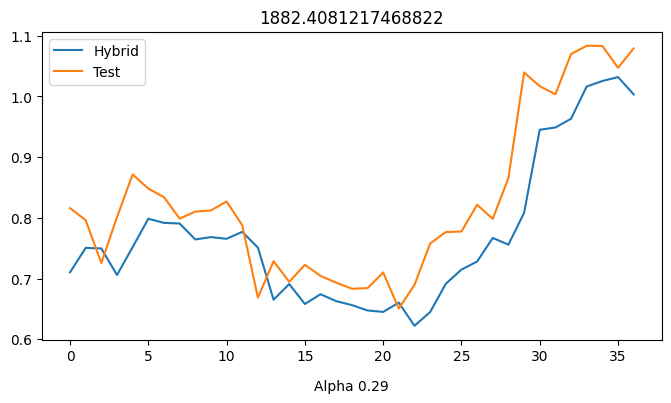

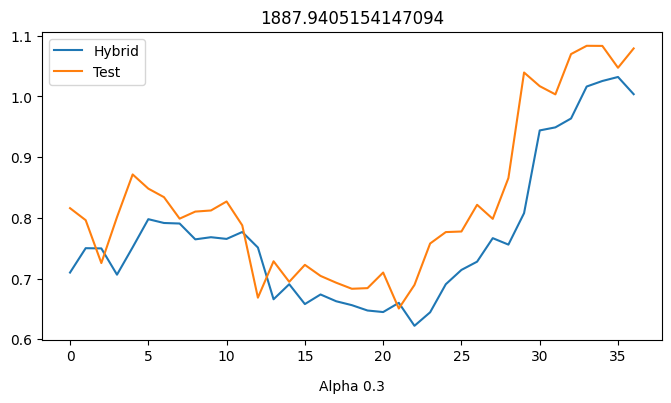

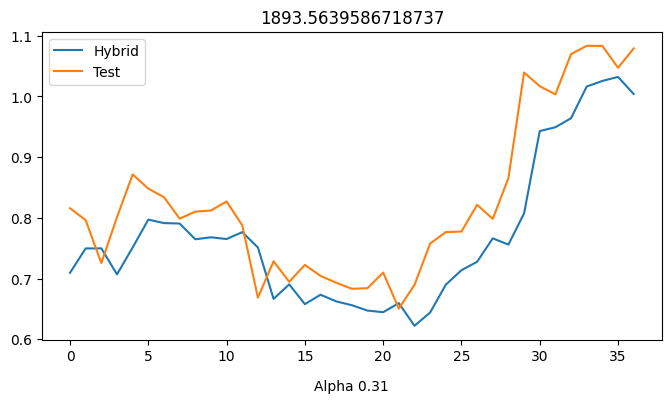

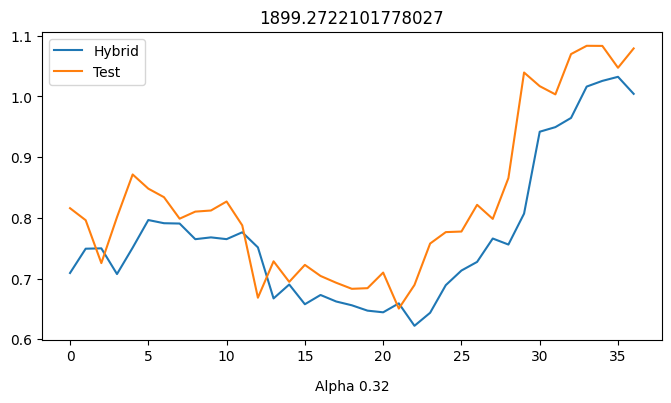

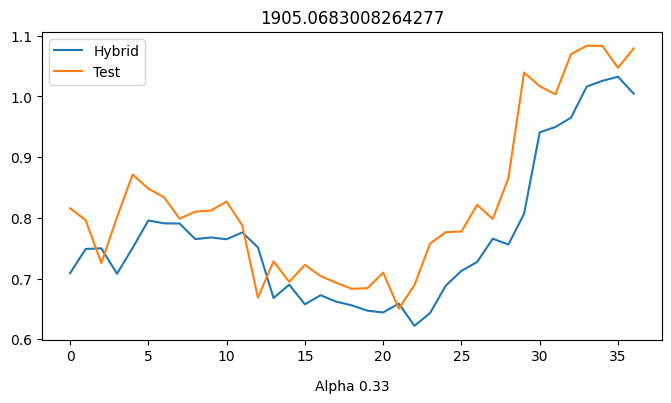

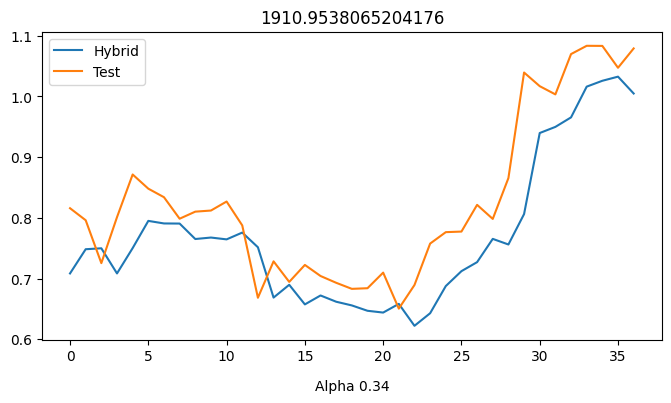

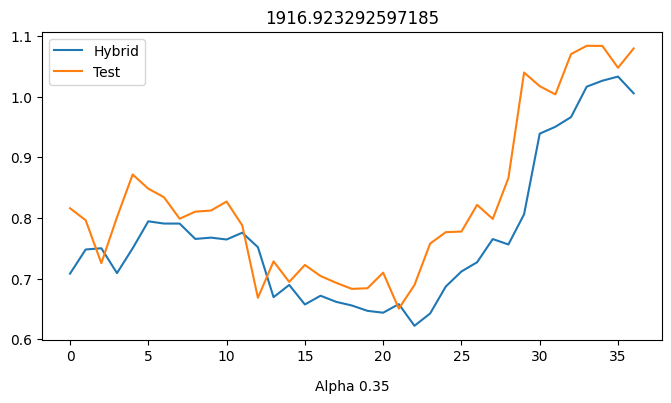

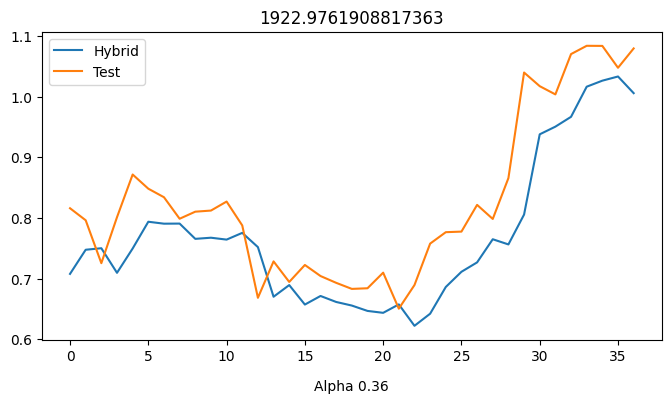

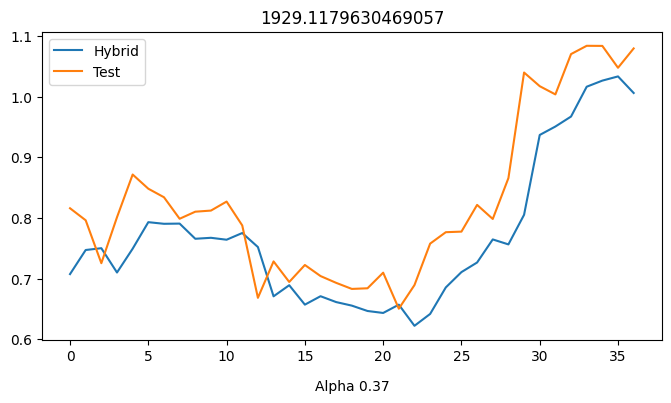

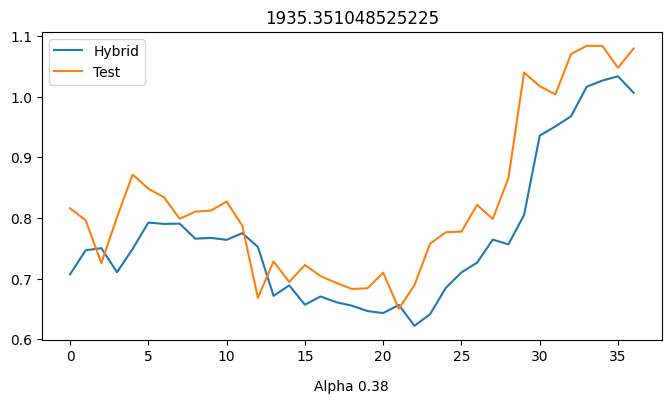

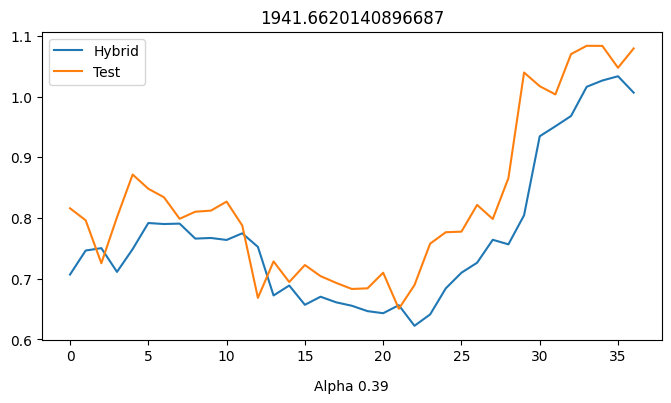

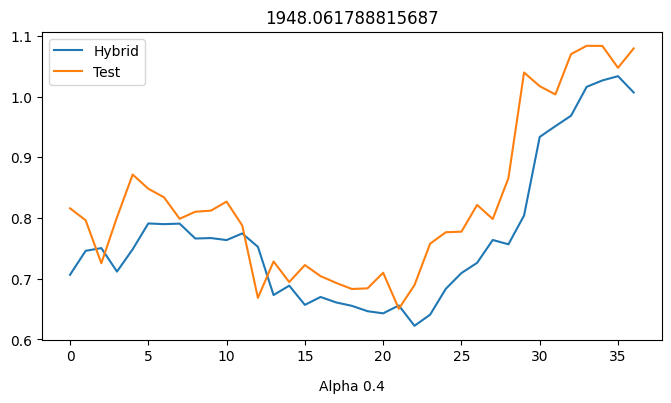

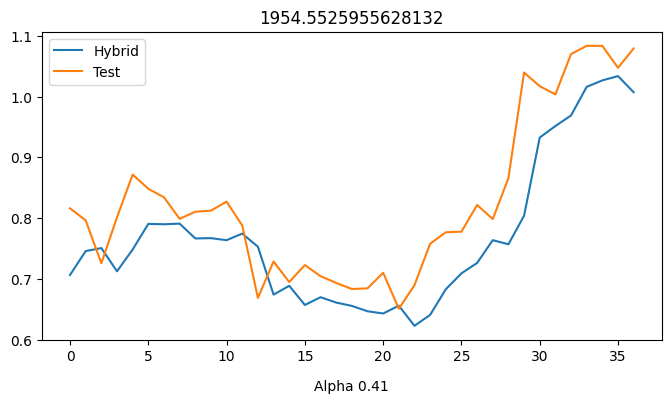

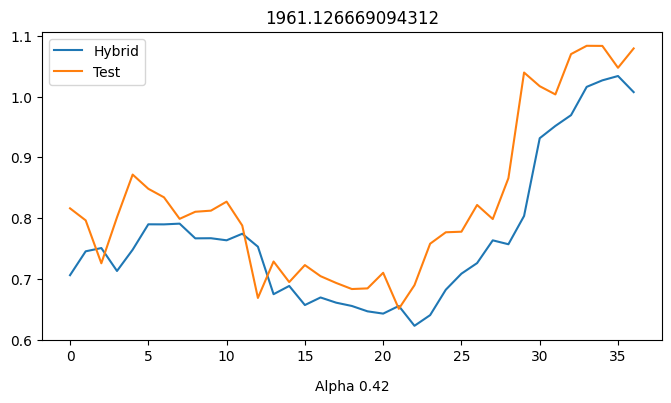

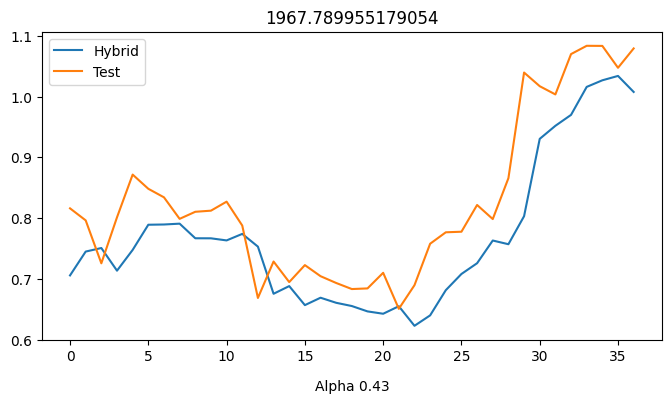

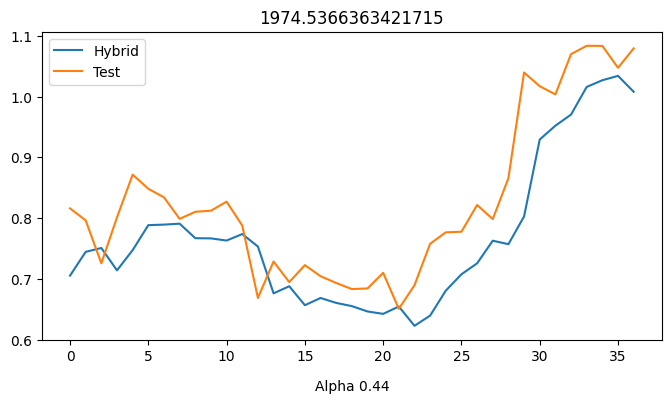

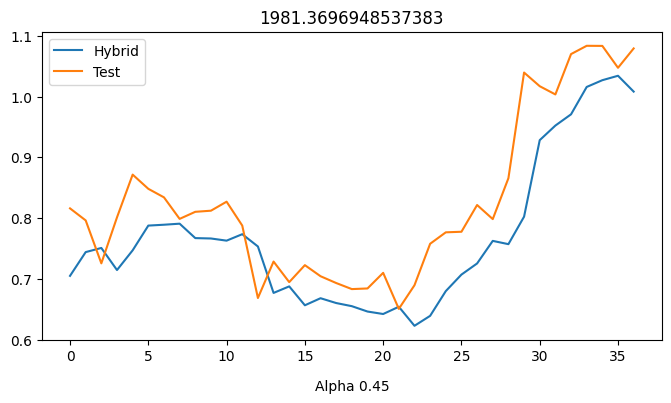

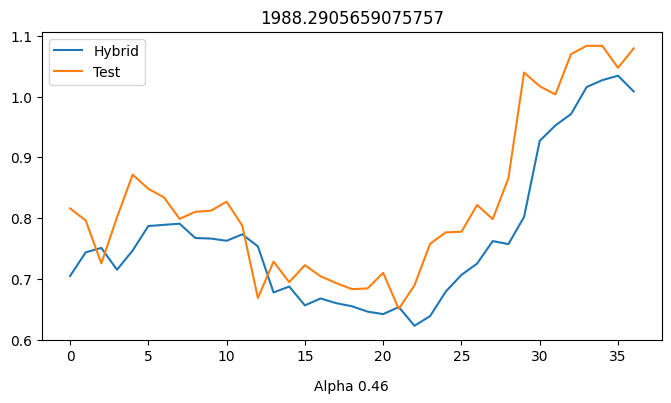

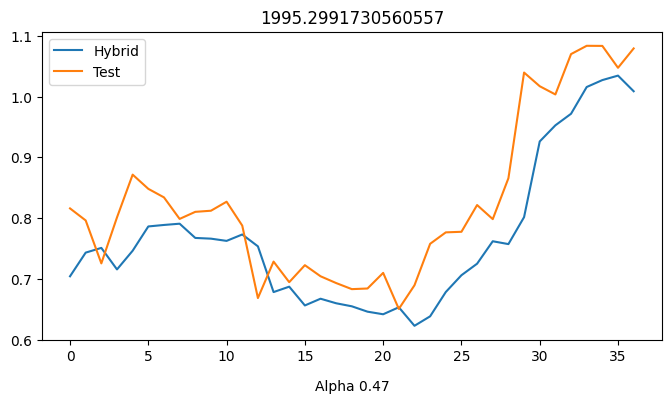

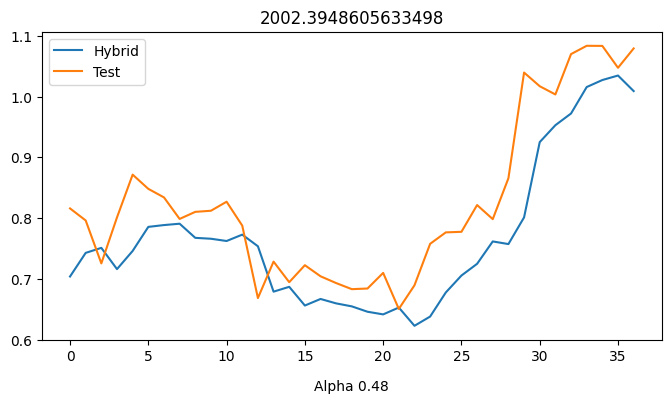

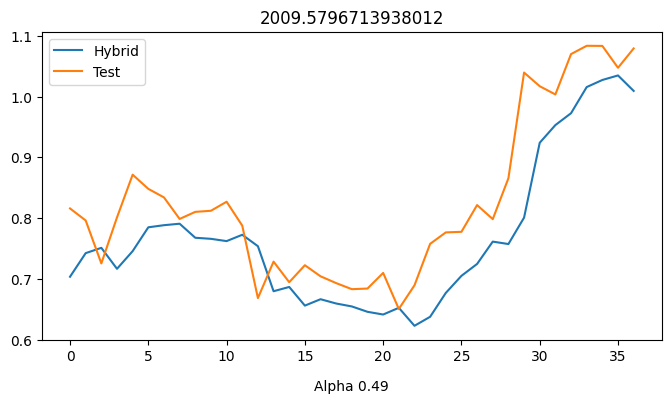

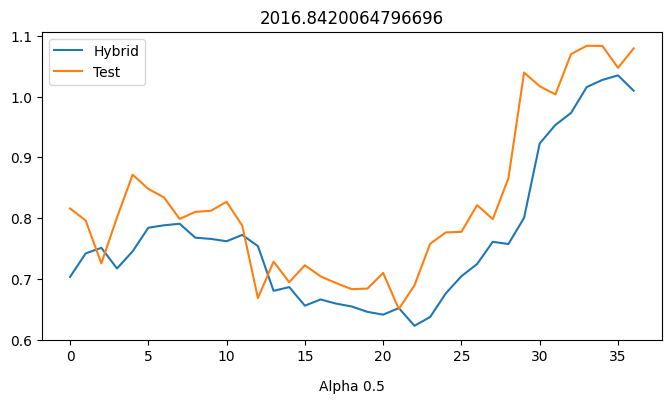

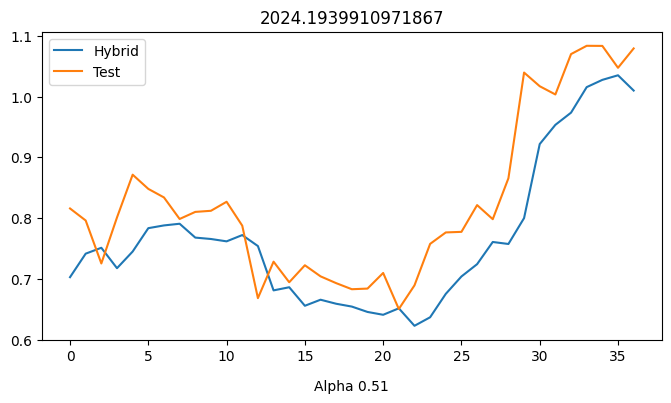

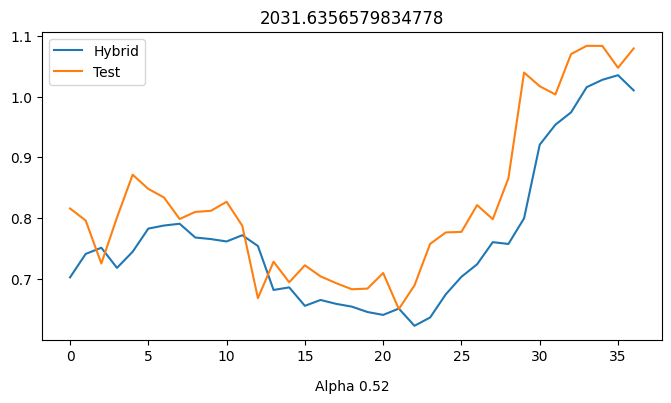

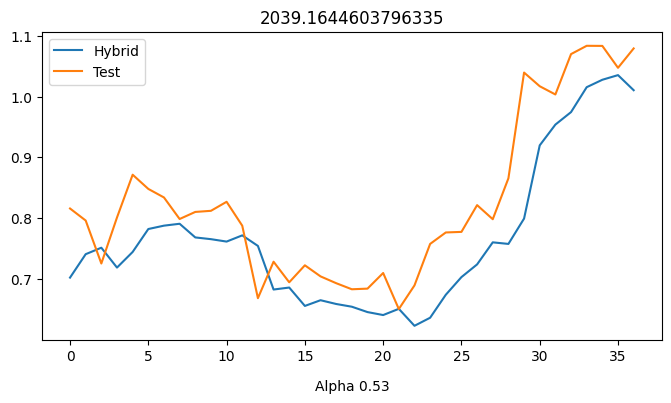

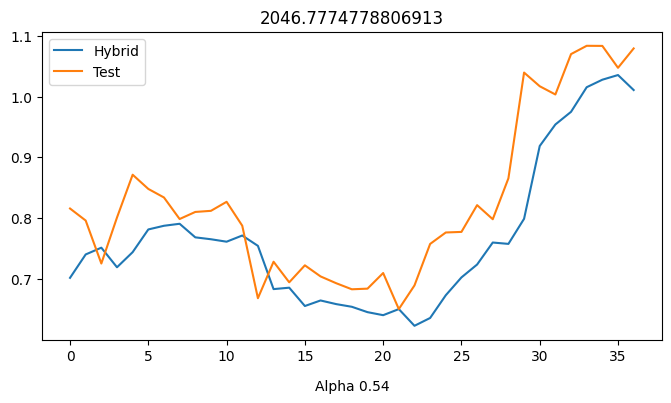

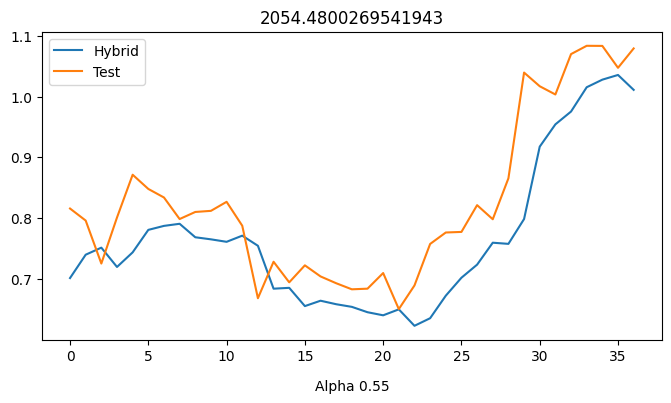

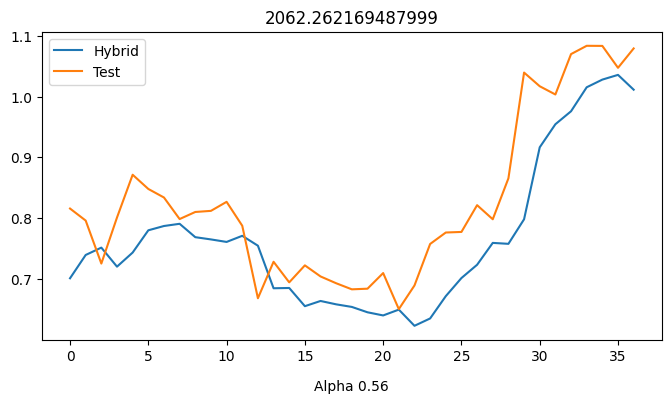

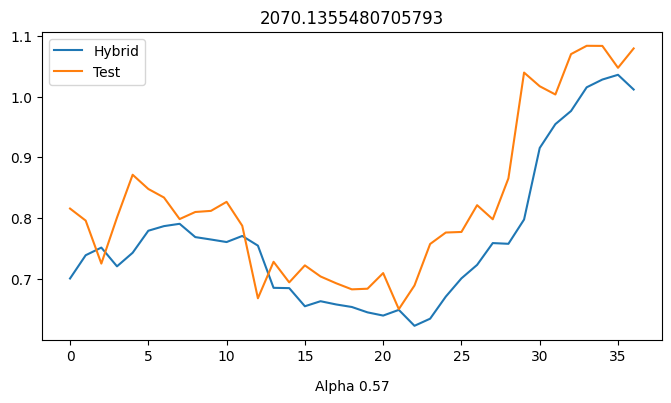

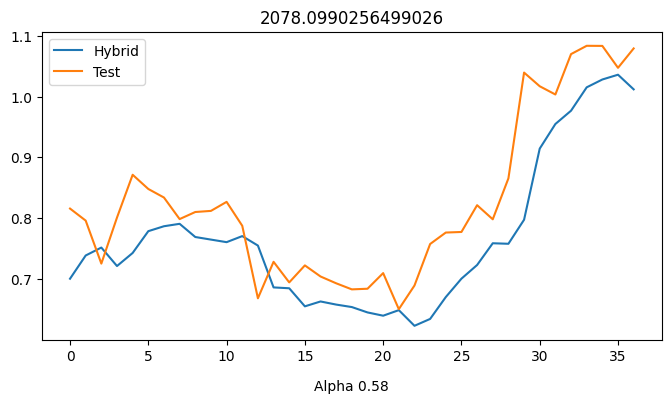

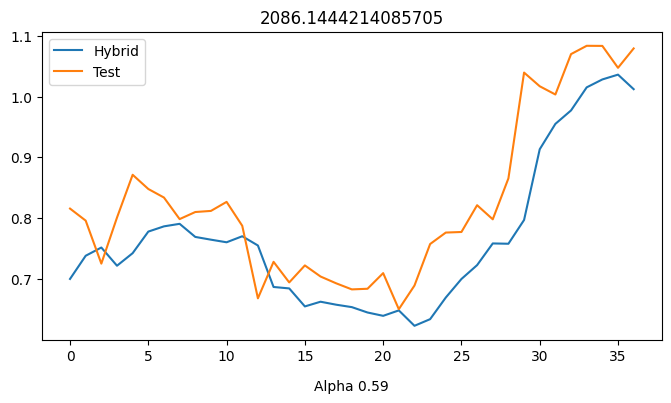

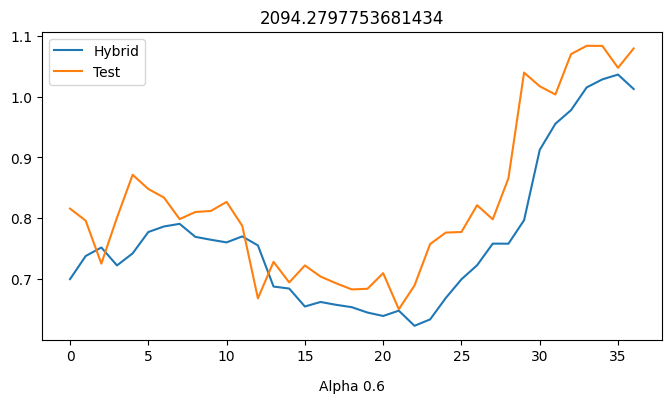

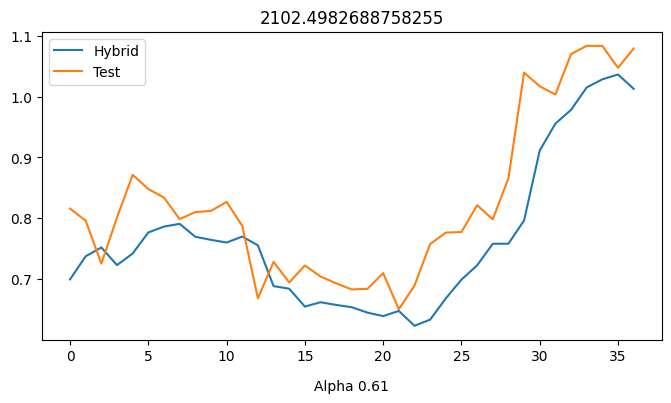

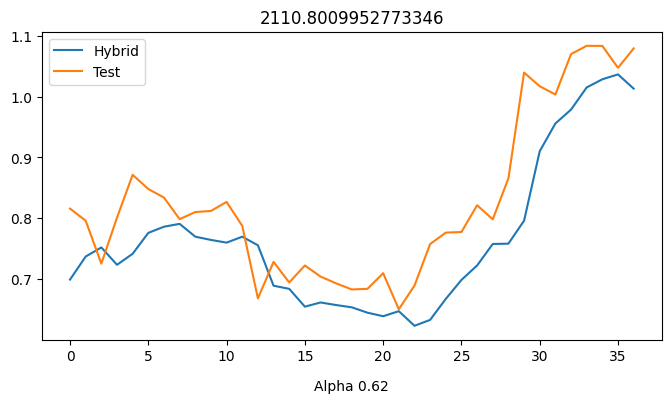

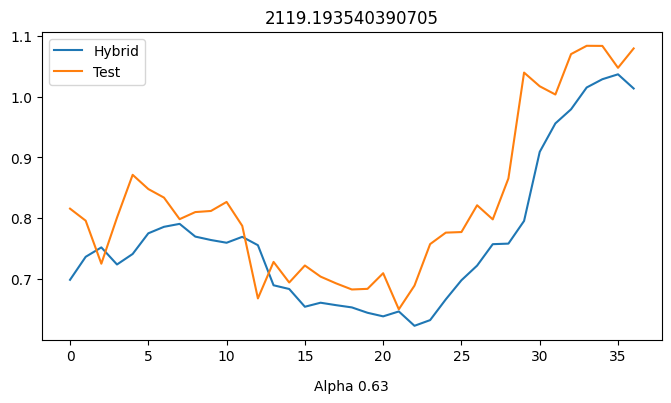

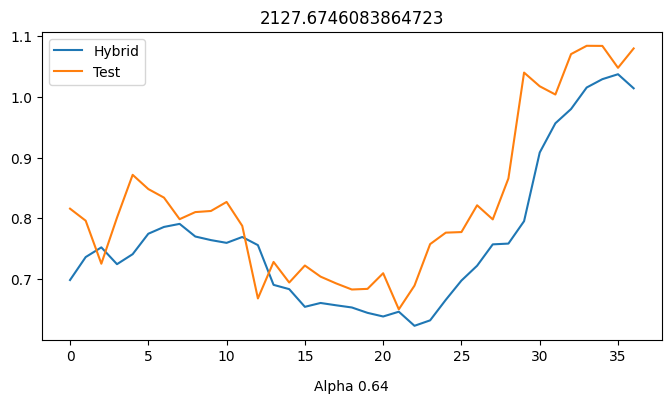

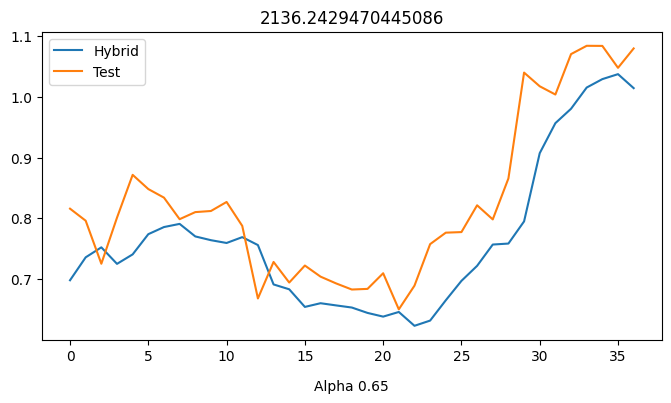

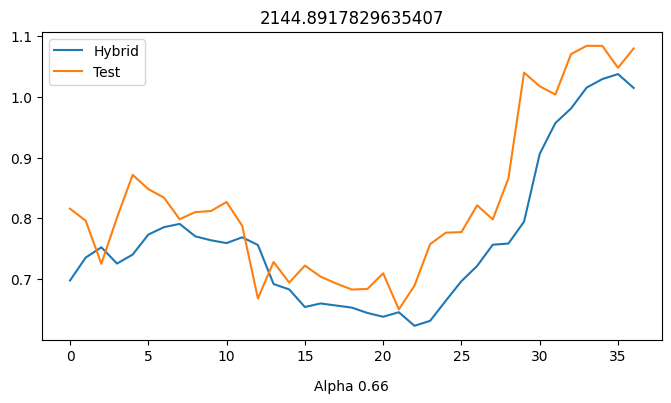

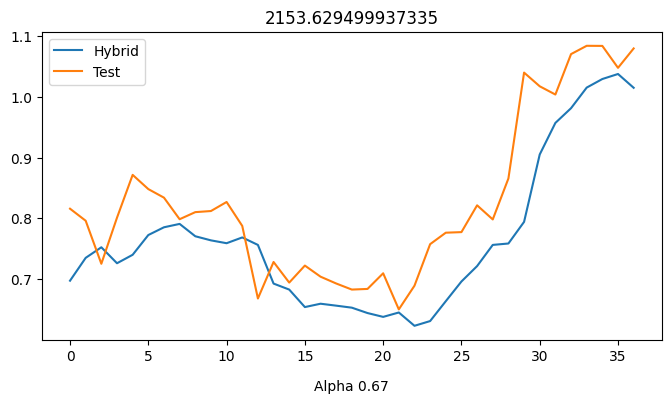

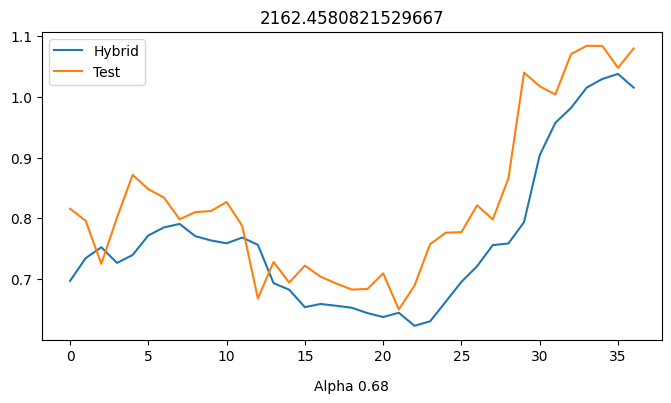

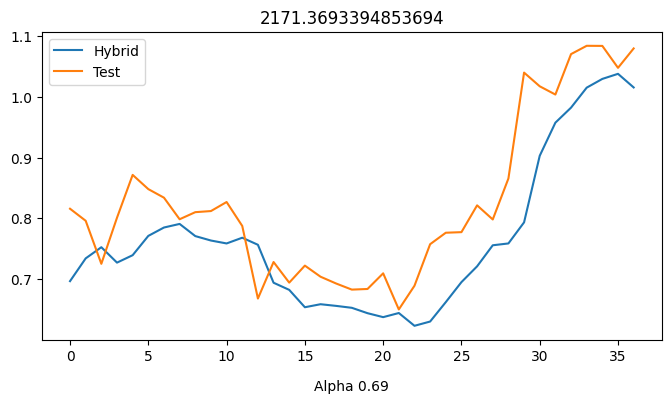

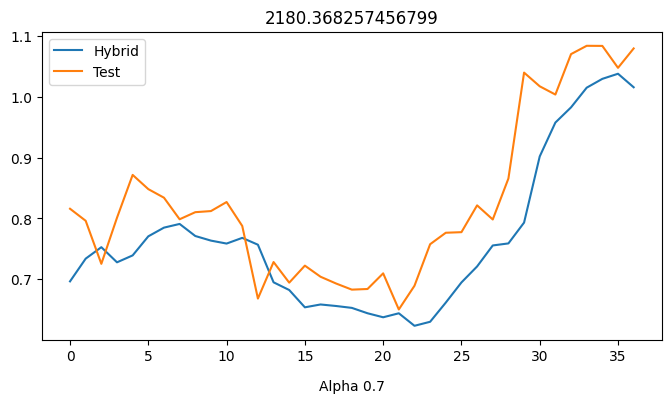

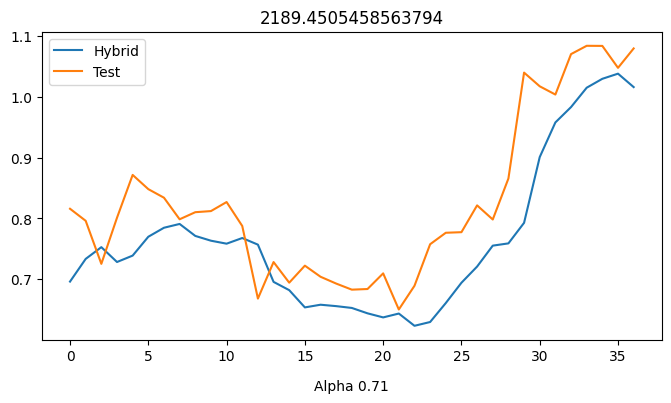

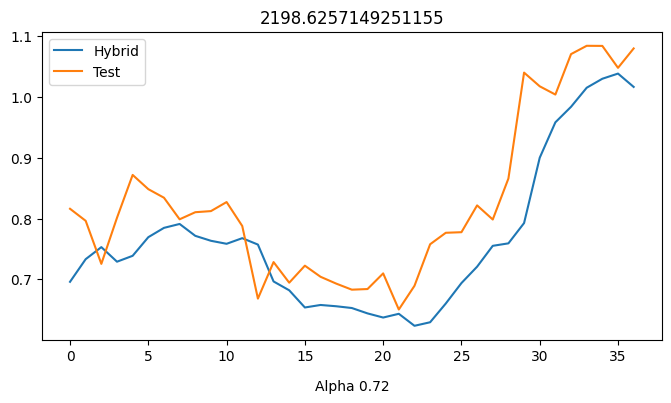

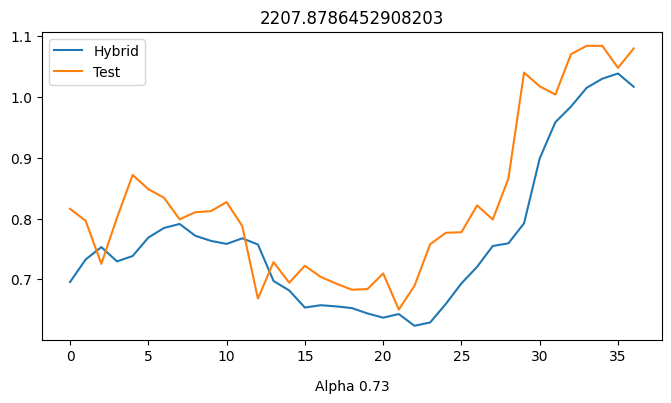

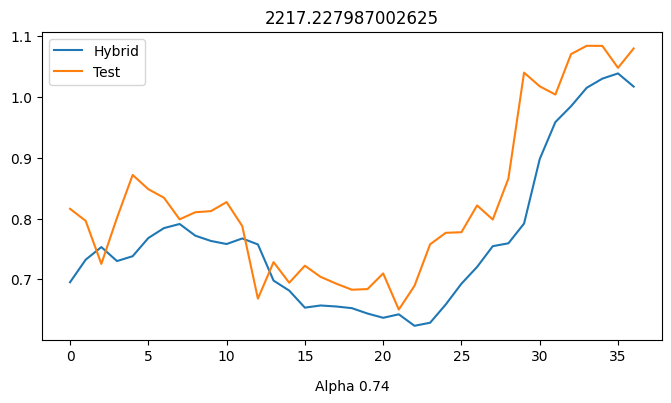

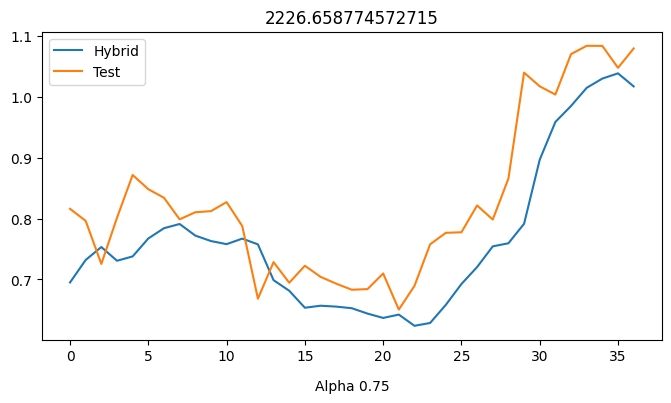

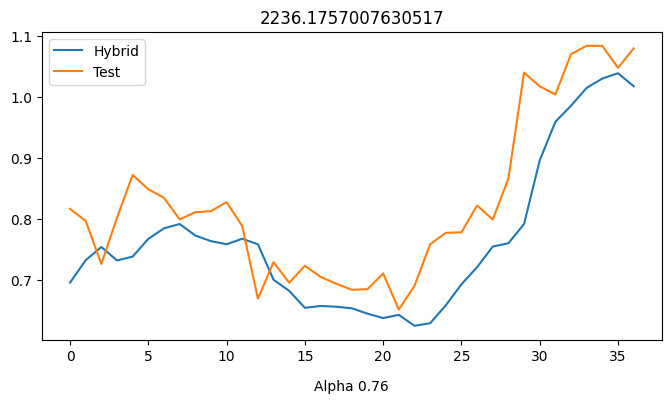

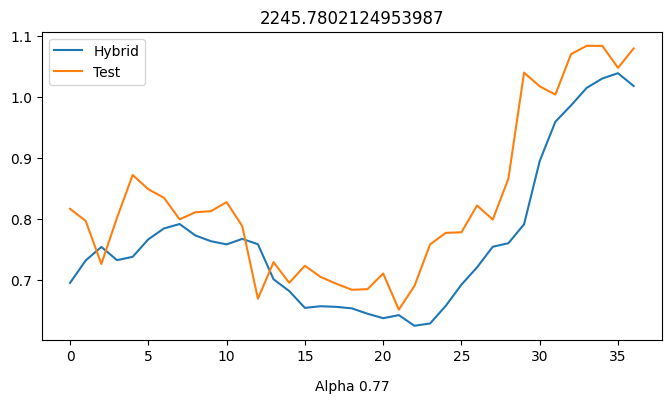

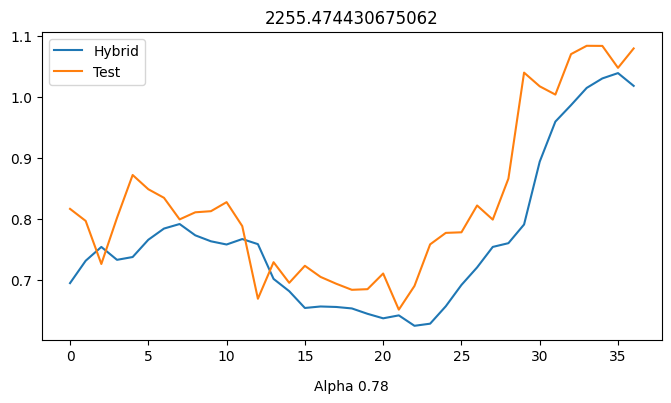

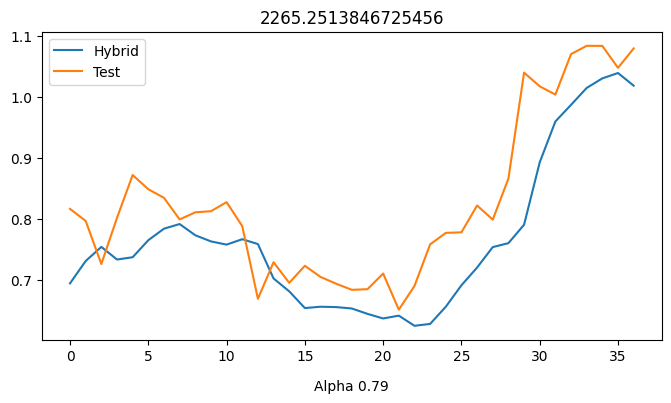

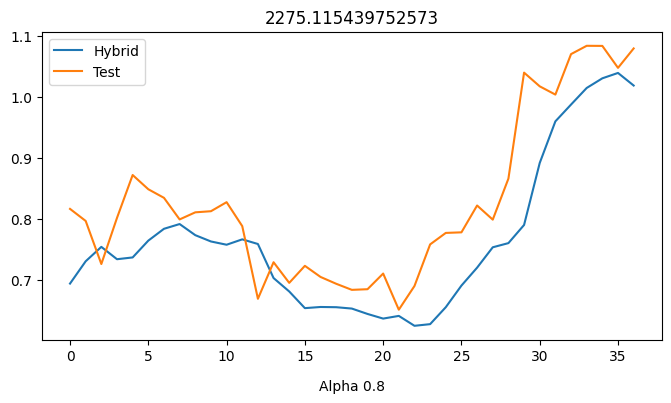

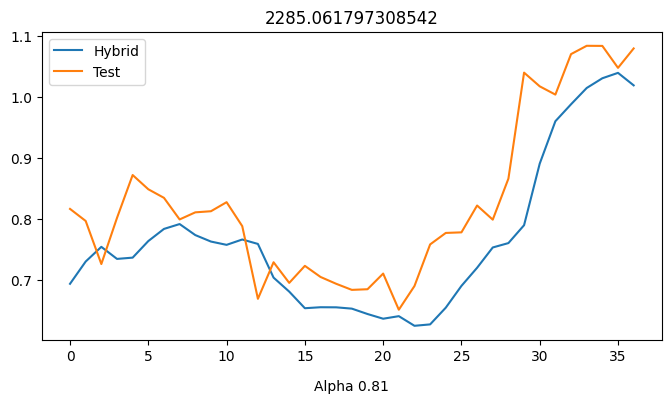

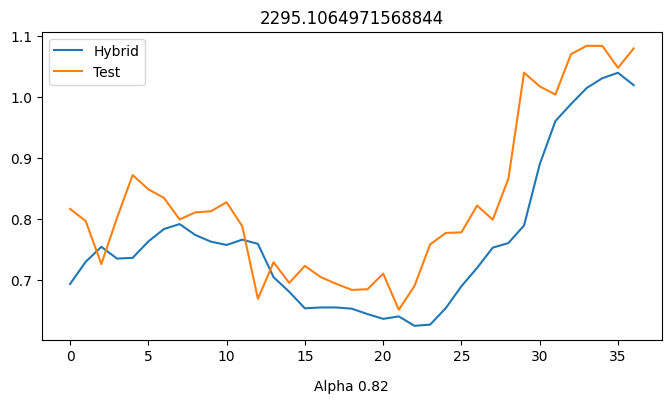

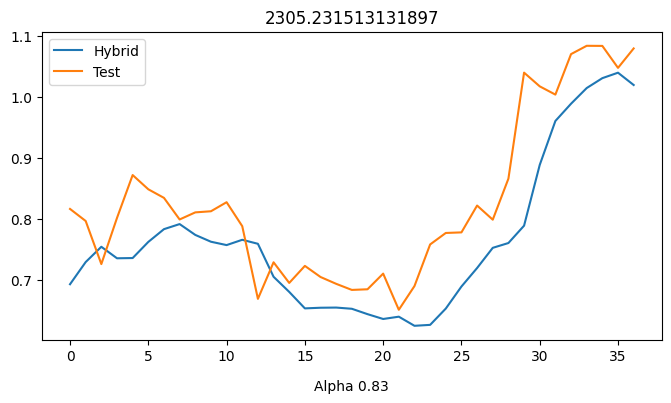

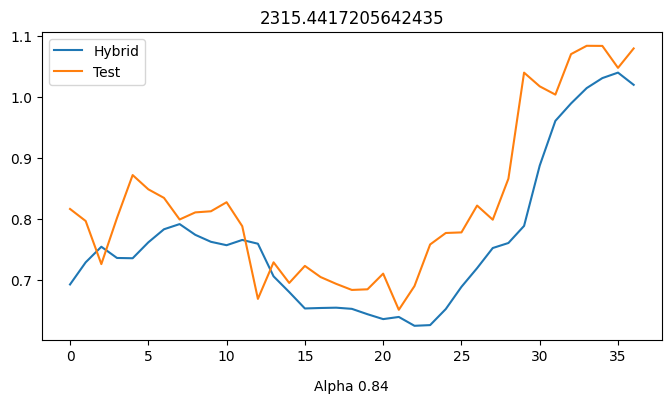

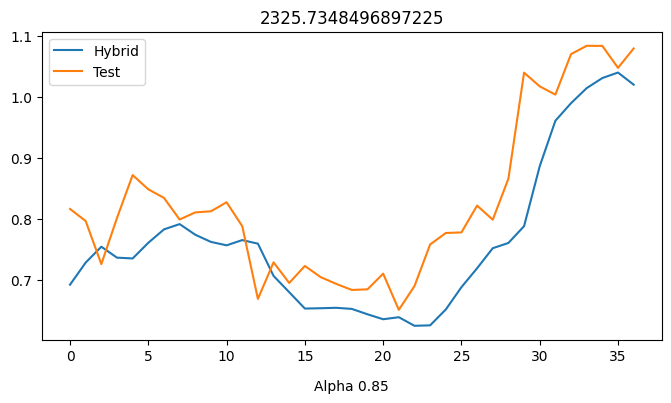

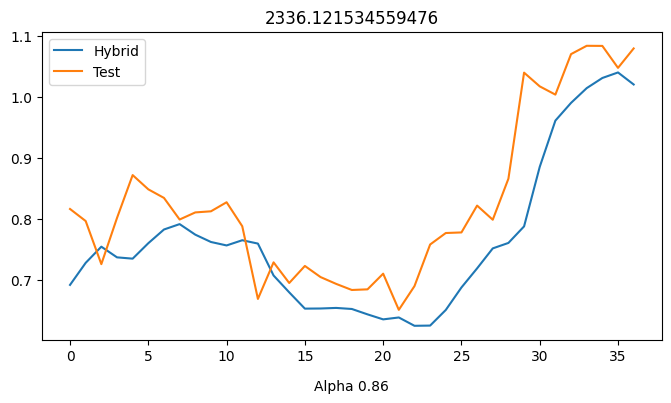

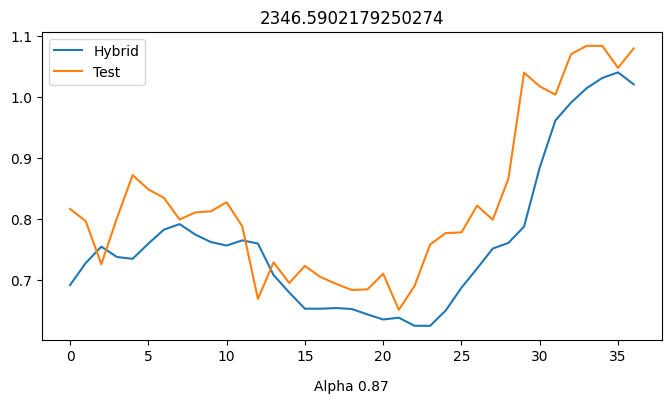

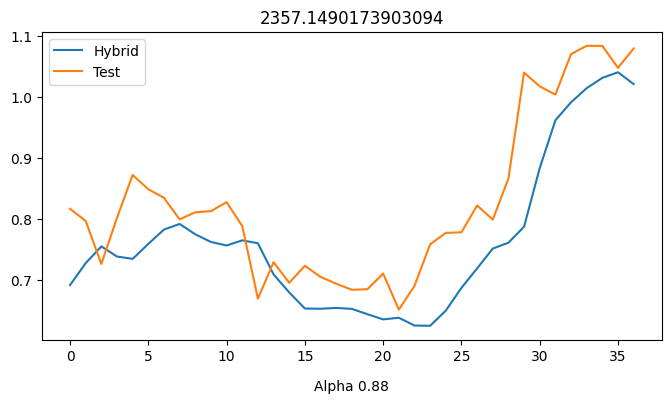

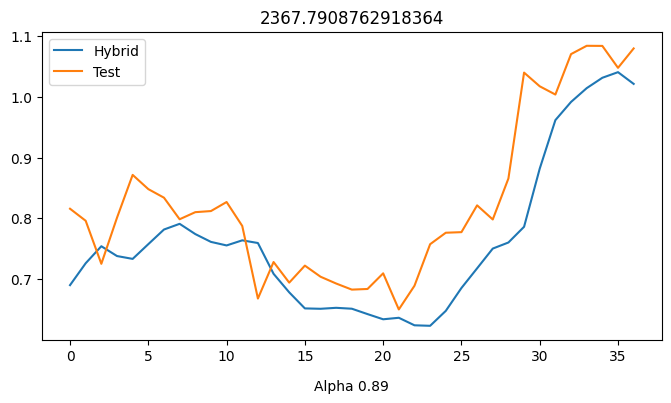

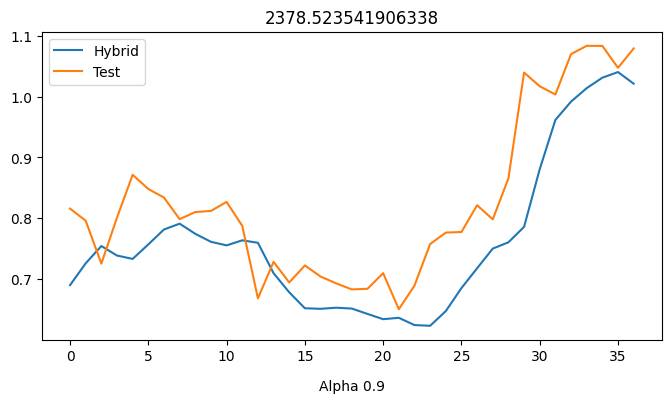

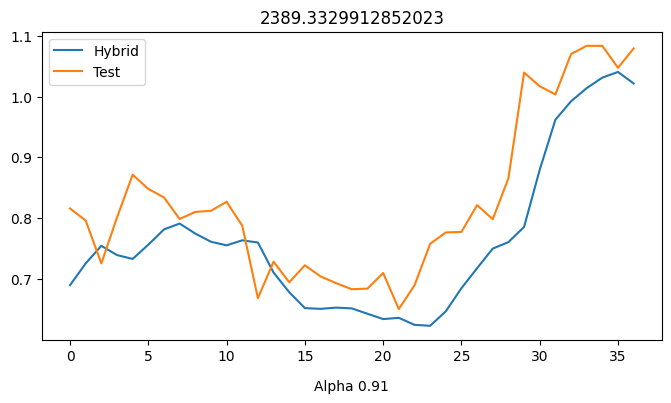

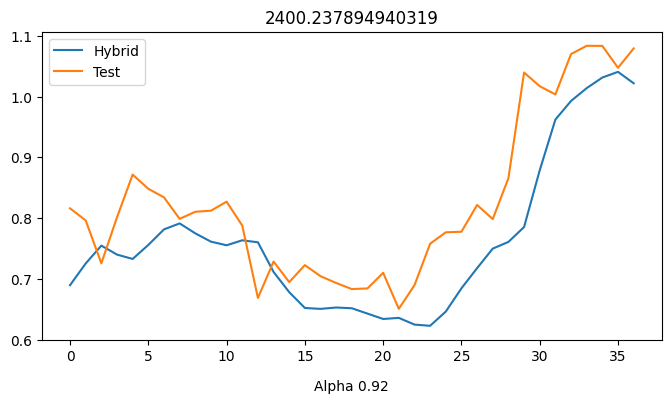

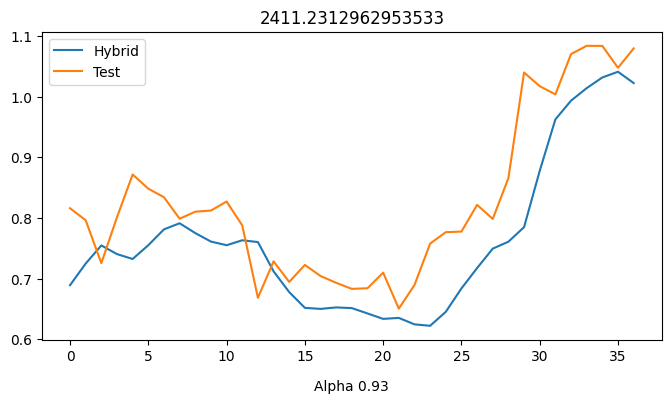

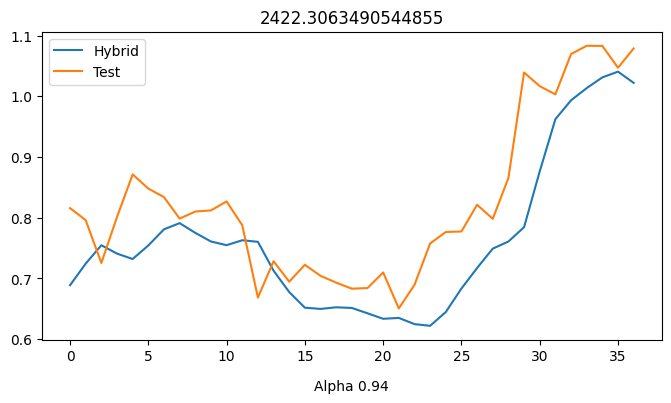

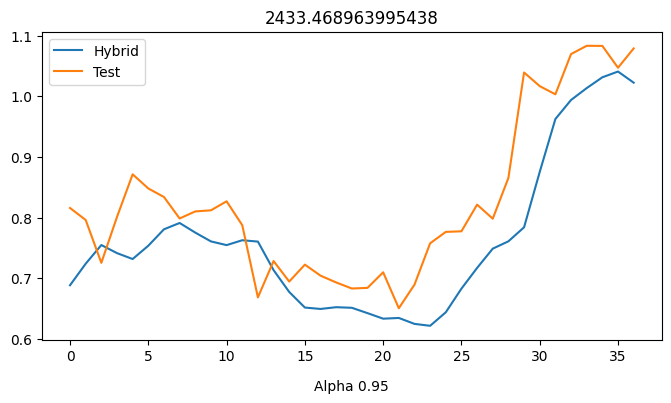

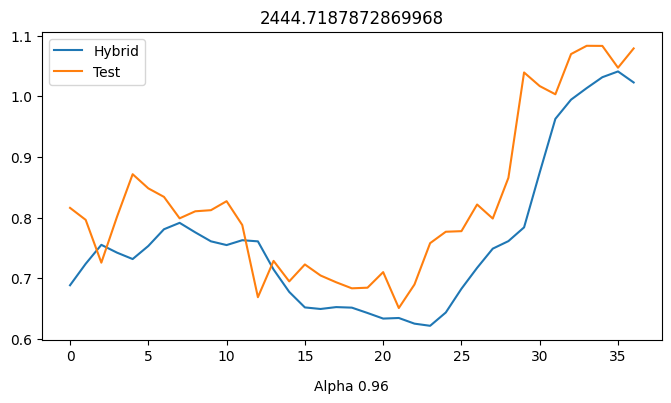

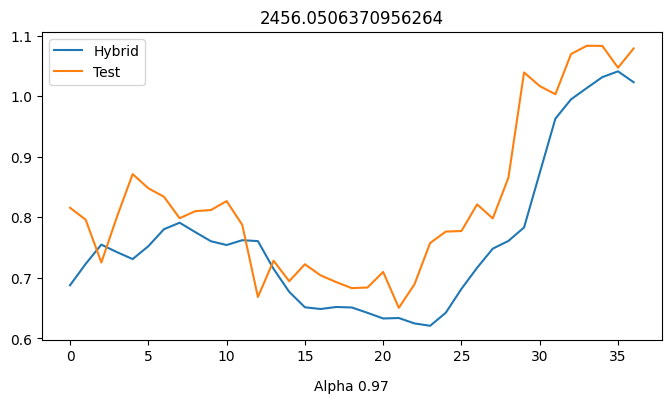

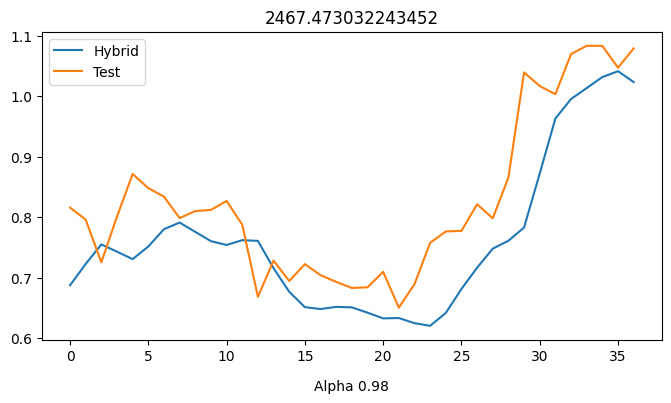

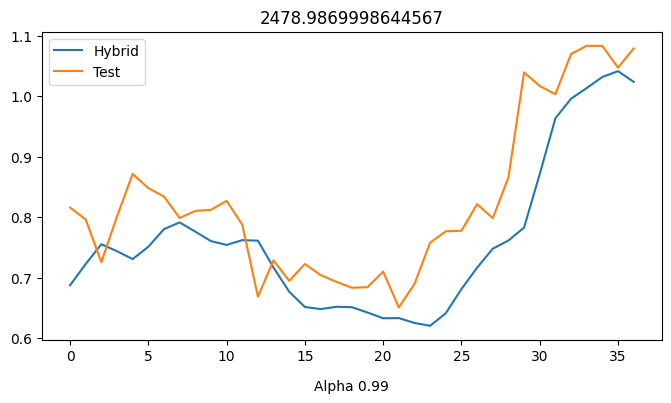

In [85]:
from sklearn.metrics import mean_squared_error
temp = 99999999
alpha = 0
inverse_Y_test = scaler.inverse_transform(Y_test.reshape(-1,1))
for i in range(1,100):
  fig, ax = plt.subplots(figsize=(8, 4))

  a = i / 100
  hybrid_pred_temp = a * lstm_pred + (1 - a) * gru_pred

  plt.plot(hybrid_pred_temp, label="Hybrid")
  plt.plot(Y_test, label="Test")
  plt.text(0.5, -0.15, f'Alpha {a}', ha='center', va='center', transform=ax.transAxes)

  inverse_Y_pred = scaler.inverse_transform(hybrid_pred_temp)
  mse_temp  = mean_squared_error(inverse_Y_test, inverse_Y_pred)
  if(mse_temp<temp):
    temp = mse_temp
    alpha = a
  plt.title(mse_temp)
  plt.legend()

  plt.show()


In [86]:
alpha

0.01

In [87]:
hybrid_pred = alpha * lstm_pred + (1 - alpha) * gru_pred

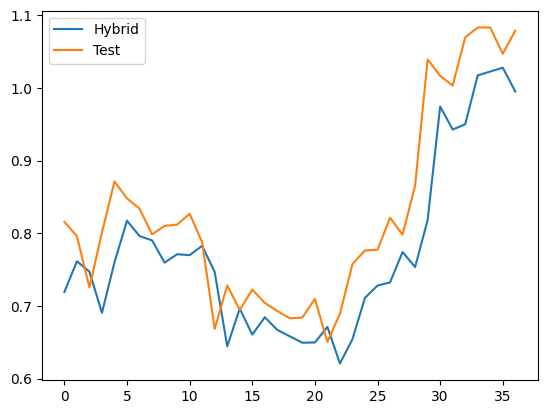

In [88]:
plt.plot(hybrid_pred,label="Hybrid")
plt.plot(Y_test,label="Test")
plt.legend()
plt.show()

In [89]:
lstm_pred

array([[0.6868931 ],
       [0.72206503],
       [0.7552721 ],
       [0.7442287 ],
       [0.73028064],
       [0.7503466 ],
       [0.7800115 ],
       [0.79128736],
       [0.7761968 ],
       [0.76028675],
       [0.75391394],
       [0.76171136],
       [0.7612835 ],
       [0.71720296],
       [0.67643917],
       [0.6512615 ],
       [0.647578  ],
       [0.651537  ],
       [0.6509757 ],
       [0.6421674 ],
       [0.6325158 ],
       [0.6326198 ],
       [0.6250129 ],
       [0.61989677],
       [0.64035386],
       [0.68053585],
       [0.716285  ],
       [0.7475581 ],
       [0.76138824],
       [0.7823388 ],
       [0.8702061 ],
       [0.96377355],
       [0.9964653 ],
       [1.0135102 ],
       [1.0320308 ],
       [1.0417266 ],
       [1.0241573 ]], dtype=float32)

In [90]:
hybrid_pred_real = scaler.inverse_transform(hybrid_pred)
y_real = scaler.inverse_transform(Y_test.reshape(-1,1))
hybrid_pred_real,y_real

(array([[3396.413 ],
        [3420.7488],
        [3412.495 ],
        [3379.9043],
        [3419.9805],
        [3452.9285],
        [3440.738 ],
        [3437.3271],
        [3419.6785],
        [3426.3545],
        [3425.595 ],
        [3433.0188],
        [3412.248 ],
        [3353.3267],
        [3383.2666],
        [3362.6157],
        [3376.3782],
        [3366.3335],
        [3361.2366],
        [3356.1553],
        [3356.3838],
        [3368.7148],
        [3339.719 ],
        [3359.0635],
        [3391.842 ],
        [3401.4924],
        [3404.0276],
        [3428.1182],
        [3416.1636],
        [3453.4023],
        [3543.458 ],
        [3525.231 ],
        [3529.3555],
        [3568.189 ],
        [3571.1997],
        [3574.2725],
        [3555.357 ]], dtype=float32),
 array([[3452.05],
        [3440.65],
        [3399.95],
        [3443.55],
        [3484.05],
        [3470.6 ],
        [3462.5 ],
        [3442.1 ],
        [3448.8 ],
        [3449.85],
        [3458.4 

In [91]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_real, hybrid_pred_real)
mae

34.257210726351445

In [92]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_real, hybrid_pred_real)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MAE: 34.257210726351445
MSE: 1762.5401215555935
RMSE: 41.98261689742069


In [93]:
lstm_pred = scaler.inverse_transform(lstm_pred)
mae1 = mean_absolute_error(y_real, lstm_pred)
mse1 = mean_squared_error(y_real, lstm_pred)
rmse1 = np.sqrt(mse1)
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")

MAE: 40.97095518369943
MSE: 2490.5800354467283
RMSE: 49.905711451162865


In [94]:
gru_pred = scaler.inverse_transform(gru_pred)
mae1 = mean_absolute_error(y_real, gru_pred)
mse1 = mean_squared_error(y_real, gru_pred)
rmse1 = np.sqrt(mse1)
print(f"MAE: {mae1}")
print(f"MSE: {mse1}")
print(f"RMSE: {rmse1}")

MAE: 34.20078125000009
MSE: 1759.516557634464
RMSE: 41.946591728464234


In [95]:
lstm_pred_train = lstm.predict(X_train)
gru_pred_train = gru.predict(X_train)


6/6 [==============================] - 0s 29ms/step


In [96]:
lstm_pred_val = lstm.predict(X_val)
gru_pred_val = gru.predict(X_val)

1/1 [==============================] - 0s 52ms/step


In [97]:
hybrid_prediction_train = alpha * lstm_pred_train + (1 - alpha) * gru_pred_train
hybrid_prediction_train = scaler.inverse_transform(hybrid_prediction_train)

In [98]:
hybrid_prediction_val = alpha * lstm_pred_val + (1 - alpha) * gru_pred_val
hybrid_prediction_val = scaler.inverse_transform(hybrid_prediction_val)

In [99]:
hybrid_prediction_val

array([[3277.151 ],
       [3261.2866],
       [3290.0383],
       [3301.9167],
       [3306.2964],
       [3312.7532],
       [3267.7576],
       [3265.349 ],
       [3254.3738],
       [3316.942 ],
       [3466.9658],
       [3447.3303],
       [3465.7185],
       [3444.143 ],
       [3441.8047],
       [3357.0173],
       [3381.1282],
       [3379.4082],
       [3368.6648],
       [3375.646 ],
       [3339.608 ]], dtype=float32)

In [100]:
y_plot = df[target]
y_plot = y_plot[timestamp:]


In [101]:
indexes = y_plot.index

In [102]:
indexes

Index(['24-Oct-2022', '25-Oct-2022', '27-Oct-2022', '28-Oct-2022',
       '31-Oct-2022', '01-Nov-2022', '02-Nov-2022', '03-Nov-2022',
       '04-Nov-2022', '07-Nov-2022',
       ...
       '08-Sep-2023', '11-Sep-2023', '12-Sep-2023', '13-Sep-2023',
       '14-Sep-2023', '15-Sep-2023', '18-Sep-2023', '20-Sep-2023',
       '21-Sep-2023', '22-Sep-2023'],
      dtype='object', name='Date ', length=228)

In [103]:
hybrid_pred_test = hybrid_pred_real.flatten()

In [104]:
hybrid_prediction_train = hybrid_prediction_train.flatten()
hybrid_prediction_val = hybrid_prediction_val.flatten()

In [105]:
value = np.concatenate((hybrid_prediction_train,hybrid_prediction_val))
value = np.concatenate((value,hybrid_pred_test))

In [106]:
value_df = pd.DataFrame(value,index = indexes,columns=["Close"])


In [107]:
y_df = pd.DataFrame(y_plot)
y_df

close 
Date                
24-Oct-2022  3161.70
25-Oct-2022  3162.10
27-Oct-2022  3157.40
28-Oct-2022  3163.25
31-Oct-2022  3193.15
...              ...
15-Sep-2023  3598.30
18-Sep-2023  3606.15
20-Sep-2023  3606.05
21-Sep-2023  3585.30
22-Sep-2023  3603.65

[228 rows x 1 columns]

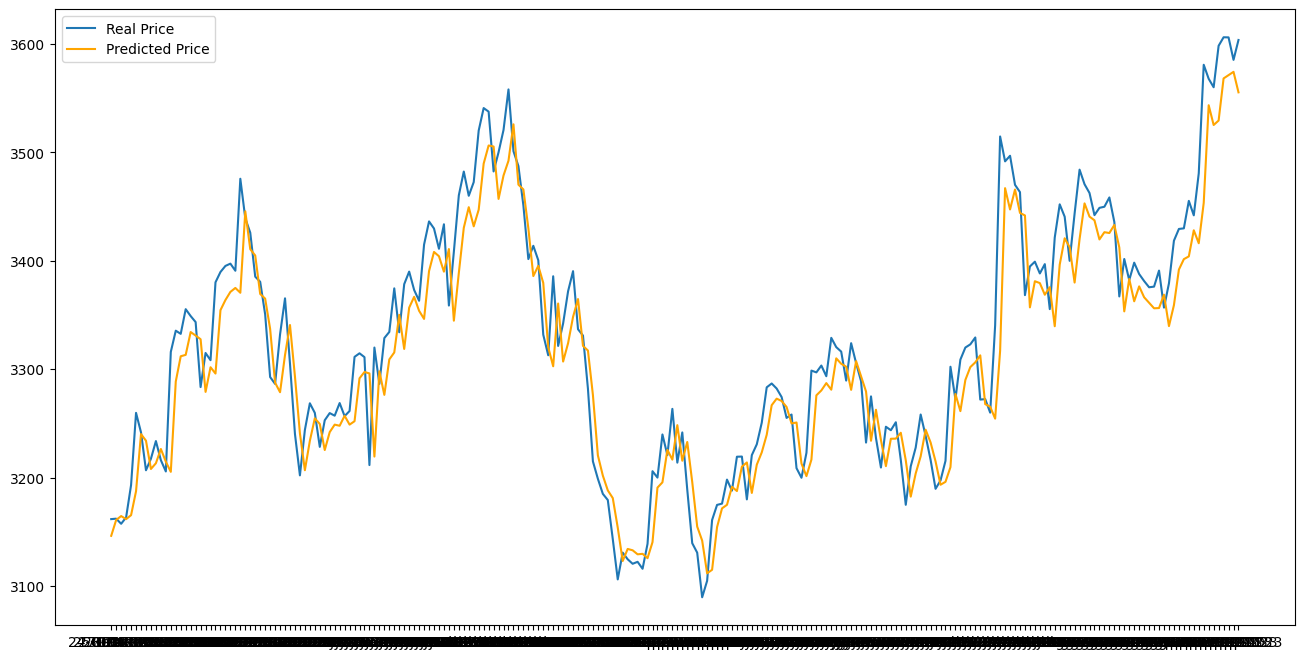

In [108]:
plt.figure(figsize=(16, 8))
plt.plot(y_df.index,y_df['close '],label='Real Price')
plt.plot(value_df, label='Predicted Price',color='orange')
plt.legend()
plt.show()

In [109]:
new_df = df.reset_index()
new_df = new_df[["Date ","close "]]
new_df = new_df.rename(columns = {"Date ":"ds","close ":"y"})
new_df.head()

ds        y
0  23-Sep-2022  2982.05
1  26-Sep-2022  2994.40
2  27-Sep-2022  3017.45
3  28-Sep-2022  3035.65
4  29-Sep-2022  2997.30

In [110]:
import datetime
new_df['ds'] = new_df['ds'].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%Y').strftime('%Y-%m-%d'))

In [111]:
from prophet import Prophet
fbp = Prophet(daily_seasonality = True)
fbp.fit(new_df)
fut = fbp.make_future_dataframe(periods=2)
forecast = fbp.predict(fut)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpec6_z0bd/ewpnjr9z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpec6_z0bd/ux3a6o0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65158', 'data', 'file=/tmp/tmpec6_z0bd/ewpnjr9z.json', 'init=/tmp/tmpec6_z0bd/ux3a6o0r.json', 'output', 'file=/tmp/tmpec6_z0bd/prophet_modelgyjp0dxe/prophet_model-20240113082738.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:27:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:27:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [112]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(fbp, forecast)

In [113]:
prophet_model2 = Prophet()

In [114]:
train = train.reset_index()

In [115]:
train = train[["Date ","close "]]
train = train.rename(columns = {"Date ":"ds","close ":"y"})

In [116]:
train.head()

ds        y
0  23-Sep-2022  2982.05
1  26-Sep-2022  2994.40
2  27-Sep-2022  3017.45
3  28-Sep-2022  3035.65
4  29-Sep-2022  2997.30

In [117]:
train['ds'] = train['ds'].apply(lambda x: datetime.datetime.strptime(x, '%d-%b-%Y').strftime('%Y-%m-%d'))

In [118]:
new_test = test[20:]

In [119]:
prophet_model2.fit(train)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpec6_z0bd/zvjhqvjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpec6_z0bd/5pfd3jpi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84931', 'data', 'file=/tmp/tmpec6_z0bd/zvjhqvjz.json', 'init=/tmp/tmpec6_z0bd/5pfd3jpi.json', 'output', 'file=/tmp/tmpec6_z0bd/prophet_modely18fskys/prophet_model-20240113082739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:27:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:27:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [120]:
future = prophet_model2.make_future_dataframe(periods=len(new_test))
prophet_predictions = prophet_model2.predict(future)

In [121]:
prophet_predictions.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2022-09-23  2982.667060  2914.800832  3048.319303  2982.667060  2982.667060   
1 2022-09-26  3000.571488  2935.784865  3066.785843  3000.571488  3000.571488   
2 2022-09-27  3006.539631  2936.867108  3071.240828  3006.539631  3006.539631   
3 2022-09-28  3012.507774  2948.318883  3087.922823  3012.507774  3012.507774   
4 2022-09-29  3018.475916  2961.842697  3092.627652  3018.475916  3018.475916   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        1.147615              1.147615              1.147615  1.147615   
1       -0.203382             -0.203382             -0.203382 -0.203382   
2       -1.045250             -1.045250             -1.045250 -1.045250   
3        5.725961              5.725961              5.725961  5.725961   
4        6.752350              6.752350              6.752350  6.752350   

   weekly_lower  weekly_upper  multiplicative_terms  \
0      1.147615      1.147615                   0.0   
1     -0.203382     -0.203382                   0.0   
2     -1.045250     -1.045250                   0.0   
3      5.725961      5.725961                   0.0   
4      6.752350      6.752350                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  2983.814675  
1                         0.0                         0.0  3000.368107  
2                         0.0                         0.0  3005.494381  
3                         0.0                         0.0  3018.233734  
4                         0.0                         0.0  3025.228266

In [122]:
test_real = df.iloc[:,6:7]
test_pred = prophet_predictions['yhat']

In [123]:
test_real = test_real['close ']

In [124]:
mse_prophet = mean_squared_error(test_real,test_pred)
mse_prophet

3219.3494238185813

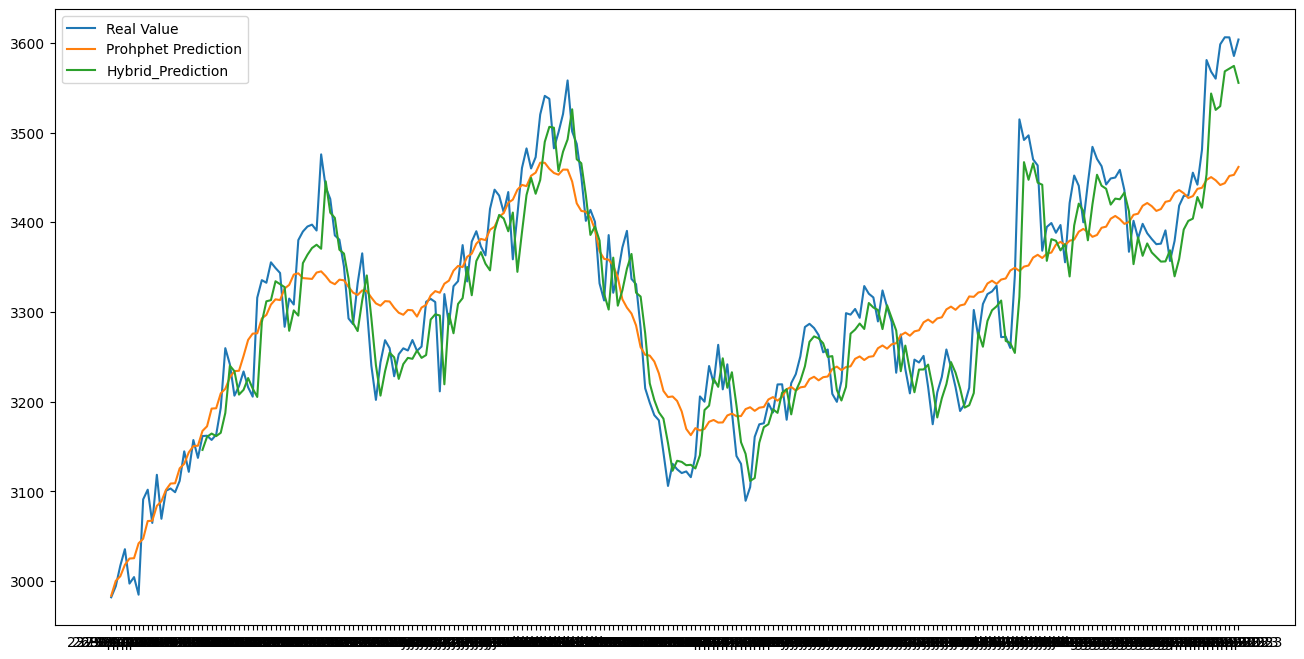

In [125]:
plt.figure(figsize=(16, 8))
plt.plot(test_real, label = "Real Value")
plt.plot(test_pred, label="Prohphet Prediction")
plt.plot(value_df['Close'], label = "Hybrid_Prediction")
plt.legend()
plt.show()

In [126]:
import joblib

In [127]:
joblib.dump(lstm_model, 'lstm_model.joblib')
joblib.dump(gru_model, 'gru_model.joblib')

['gru_model.joblib']

In [128]:
joblib.dump(prophet_model2, 'prophet_model.joblib')

['prophet_model.joblib']